# gluonts12-end_dates (monthly, deepar)

In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 50.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 51.8MB/s ta 0:00:01
    100% |████████████████████████████████| 7.3MB 6.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 194kB 59.0MB/s eta 0:00:01
    100% |████████████████████████████████| 10.4MB 4.6MB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 38.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [3]:
import gluonts
print(gluonts.__version__)

import mxnet
print(mxnet.__version__)

# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar

0.4.2
1.4.1


INFO:root:Using CPU


In [4]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_id', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_qu

In [5]:
dataname = "m4_weekly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_weekly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json


In [6]:
dataname = "m4_monthly_end032014"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.


In [7]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
length train dataset 1807
length test dataset 1807


In [8]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'item_id': 'M3991',
 'target': array([ 1499.,  1677.,  2533.,  1834.,  2922.,  2460.,  2892.,  1969.,
         2781.,  2988.,  3035.,  3172.,  1818.,  2828.,  1979.,  2821.,
         2181.,  2287.,  2320.,  2839.,  1482.,  3094.,  2410.,  2752.,
         1728.,  2112.,  1946.,  2738.,  1812.,  2142.,  2365.,  3492.,
         2875.,  3992.,  1805.,  3433.,  1287.,  2497.,  3733.,  3392.,
         3690.,  4116.,  3163.,  5815.,  4334.,  3794.,  5340.,  7929.,
        15301.,  5824.,  4470.,  7728.,  4461.,  5206.,  5083., 16296.,
         3479.,  3932.,  5383.,  3772.,  3110.,  3995.,  4393.,  5821.,
         5362.,  3344.,  4723.,  4053.,  4007.,  7126.,  3785.,  2627.,
         1963.,  3676.,  5577.,  3394.,  2389.,  1922.,  2924.,  3221.,
         3411.,  4006.,  3108.,  3576.,  2874.,  2759.,  3644.,  3669.,
         4345.,  3471.,  4172.,  3711.,  4095.,  5106.,  6184.,  5464.,
         3786.,  3505.,  4681.,  3651.,  7627.,  55

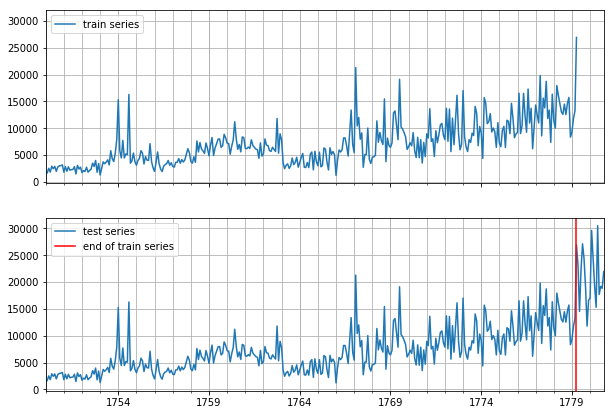

In [9]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [10]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [11]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Results

## Study 1: `m4_monthly_end032014`

In [12]:
dataname

'm4_monthly_end032014'

In [ ]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly_end032014", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

In [13]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.25it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 8.917 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835631
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.65it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 7.905 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.265816
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.47it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 8.025 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081766
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.02it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 8.326 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_los

100%|██████████| 100/100 [00:11<00:00,  8.89it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[72] Elapsed time 11.255 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.588355
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[73] Elapsed time 8.313 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.602243
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.90it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 7.758 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.521852
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.58it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[75] Elapsed time 7.950 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.539460
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.45it/s, avg_epo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.095018  0.186394  16.173892            0.170274            0.133715   

   seed  epochs  num_batches  
0    43     100          100  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.35it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 9.688 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.699839
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:10<00:00,  9.15it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[1] Elapsed time 10.927 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.208197
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.63it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 9.417 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.089057
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:12<00:00,  8.30it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 12.054 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_lo

100%|██████████| 100/100 [00:07<00:00, 12.67it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[72] Elapsed time 7.890 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.597689
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.63it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[73] Elapsed time 7.931 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.547988
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 11.47it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 8.733 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.491522
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.48it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[75] Elapsed time 8.031 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.573877
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 11.95it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 8.370

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.113479  0.186524  15.712464            0.173148            0.134562   

   seed  epochs  num_batches  
0    44     100          100  
Seed: 45


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.39it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 8.078 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.872864
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.71it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 7.876 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.253729
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.95it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 7.727 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.058174
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.77it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 7.834 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_los

100%|██████████| 100/100 [00:07<00:00, 12.90it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[72] Elapsed time 7.750 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.521201
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:10<00:00,  9.92it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[73] Elapsed time 10.084 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.550180
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.54it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 7.976 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.548367
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:07<00:00, 12.86it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 7.776 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.553921
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:07<00:00, 12.98it/s, avg_e

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.214038  0.192075  17.28293            0.184116            0.139715    45   

   epochs  num_batches  
0     100          100  
Seed: 46


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.82it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 8.478 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.877563
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.62it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 7.922 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.261975
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 8.222 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.082287
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.06it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 9.937 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_los

INFO:root:Epoch[72] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.47it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[72] Elapsed time 8.020 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.611751
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 100/100 [00:07<00:00, 12.90it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[73] Elapsed time 7.751 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.533270
INFO:root:Loading parameters from best epoch (43)
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:07<00:00, 12.88it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 7.786 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.533245
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:07<00:00, 12.57it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[75] Elapsed time 7.976 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.589262
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|███

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.11054  0.189684  16.741209            0.175028            0.141047    46   

   epochs  num_batches  
0     100          100  
Seed: 47


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.35it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 8.098 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.868606
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.86it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[1] Elapsed time 7.776 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.285495
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.63it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 7.937 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081832
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.92it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 7.742 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_los

100%|██████████| 100/100 [00:10<00:00,  9.89it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[72] Elapsed time 10.119 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.489371
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.47it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[73] Elapsed time 8.036 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.525625
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.65it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 7.910 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.582652
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 12.94it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 7.734 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.563914
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:07<00:00, 12.81it/s, avg_ep

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.128267  0.188297  15.982008            0.175743            0.134602   

   seed  epochs  num_batches  
0    47     100          100  
Seed: 48


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.55it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 7.966 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.701239
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.77it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 7.853 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.259401
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.85it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 8.462 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.126004
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.80it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 9.263 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss

INFO:root:Epoch[72] Learning rate is 0.000125
100%|██████████| 100/100 [00:09<00:00, 11.07it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[72] Elapsed time 9.040 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.559569
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 11.47it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[73] Elapsed time 8.725 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.499015
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:09<00:00, 10.92it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[74] Elapsed time 9.168 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.541010
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 8.223 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.553922
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 11.76it/s, avg_epoch

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.198774  0.196303  18.347179            0.183892            0.144892   

   seed  epochs  num_batches  
0    48     100          100  
Seed: 49


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:17<00:00,  5.67it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[0] Elapsed time 17.666 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.826908
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.43it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[1] Elapsed time 13.471 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.310908
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:12<00:00,  8.20it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 12.208 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.182963
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:12<00:00,  8.06it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 12.409 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch

INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.22it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[73] Elapsed time 8.932 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.488250
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.54it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[74] Elapsed time 7.977 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.540201
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.51it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 8.008 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.557754
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.51it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[76] Elapsed time 7.995 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.518074
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.53it/s, avg_epoch_loss=6.55]
IN

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.21926  0.193375  18.095816            0.178724             0.13577    49   

   epochs  num_batches  
0     100          100  
Seed: 50


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.11it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[0] Elapsed time 8.267 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.723833
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.45it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 8.035 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.270346
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:10<00:00,  9.99it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 10.015 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.065984
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.70it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 8.558 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.484912
INFO:root:Epoch[73] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.28it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[73] Elapsed time 10.783 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.538019
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.48it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 10.560 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.551836
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:11<00:00,  9.04it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[75] Elapsed time 11.071 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.535738
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:09<00:00, 10.10it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[76] Elapsed time 9.909 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.519809
INFO:root:Epoch[77] Learning rate is 0.0005
100%|

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.139888  0.18847  16.218417             0.17639            0.137843    50   

   epochs  num_batches  
0     100          100  
Seed: 51


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:19<00:00,  5.15it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 19.421 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835717
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:16<00:00,  5.99it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 16.717 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262232
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.66it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 15.031 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.057119
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:17<00:00,  5.75it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 17.391 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.544234
INFO:root:Epoch[73] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.79it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[73] Elapsed time 8.484 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.516618
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:09<00:00, 10.13it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[74] Elapsed time 9.890 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.480791
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.12it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[75] Elapsed time 10.968 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.503605
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:09<00:00, 10.27it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[76] Elapsed time 9.734 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.566909
INFO:root:Epoch[77] Learning rate is 0.0005
100%|███

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.132541  0.190542  16.246382            0.176915            0.137895   

   seed  epochs  num_batches  
0    51     100          100  
m4_monthly_end032014


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.095018  0.186394  16.173892            0.170274            0.133715   
0  1.113479  0.186524  15.712464            0.173148            0.134562   
0  1.214038  0.192075  17.282930            0.184116            0.139715   
0  1.110540  0.189684  16.741209            0.175028            0.141047   
0  1.128267  0.188297  15.982008            0.175743            0.134602   
0  1.198774  0.196303  18.347179            0.183892            0.144892   
0  1.219260  0.193375  18.095816            0.178724            0.135770   
0  1.139888  0.188470  16.218417            0.176390            0.137843   
0  1.132541  0.190542  16.246382            0.176915            0.137895   

   seed  epochs  num_batches  
0    43     100          100  
0    44     100          100  
0    45     100          100  
0    46     100          100  
0    47     100          100  
0    48     100          100  
0    49     100          100  
0    50     100          100  
0    51     100          100

In [23]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=200, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


Seed: 42


100%|██████████| 100/100 [00:02<00:00, 35.45it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 2.822 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.875144
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[1] Elapsed time 2.639 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.377413
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 2.672 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.175824
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.66it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[3] Elapsed time 2.588 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.071695
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 2.619 seconds
INFO:root:Epoc

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[74] Elapsed time 2.602 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.614091
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.616 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.552077
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.65it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[76] Elapsed time 2.589 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.541737
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.36it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2.608 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.504925
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.6]

100%|██████████| 100/100 [00:02<00:00, 38.78it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[146] Elapsed time 2.580 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.550832
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[147] Elapsed time 2.619 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.506878
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.64it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[148] Elapsed time 2.589 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.471342
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.14it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[149] Elapsed time 2.623 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.528584
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.55it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[183] Elapsed time 2.596 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.459978
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[184] Elapsed time 2.673 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.470329
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.647 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.534549
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 2.631 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.491390
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.160452  0.196463  17.471643            0.180298            0.141814   

   seed  epochs  num_batches  
0    42     200          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 36.26it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 2.759 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835631
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 2.633 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.265816
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.26it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.615 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081764
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.13it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 2.557 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.969768
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.32it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[4] Elapsed time 2.611 seconds
INFO:root:E

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.72it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 2.584 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.516730
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[75] Elapsed time 2.628 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.504979
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 2.628 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.549049
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.91it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 2.572 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.565662
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████|

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.470861
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[110] Elapsed time 2.647 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.517859
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 2.645 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.554961
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[112] Elapsed time 2.658 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.495886
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[113] Elapsed time 2.632 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.453131
INFO:root:Epoch[114] Learning rate is 5e-05


INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.00it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[183] Elapsed time 2.565 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.423760
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.31it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[184] Elapsed time 2.612 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.491640
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[185] Elapsed time 2.618 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.515175
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.59it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[186] Elapsed time 2.592 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.482283
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.84it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.120709  0.188413  16.535842            0.175331            0.138776   

   seed  epochs  num_batches  
0    43     200          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 35.98it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.780 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.699839
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[1] Elapsed time 2.656 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.208197
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 2.685 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.089056
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 2.697 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.965638
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[4] Elapsed time 2.652 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 38.69it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[74] Elapsed time 2.586 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.463980
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.47it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.601 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.564490
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.60it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 2.592 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.511937
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[77] Elapsed time 2.650 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.490545
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[78] Elapsed time 2.634 se

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.97it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[146] Elapsed time 2.635 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.495539
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[147] Elapsed time 2.633 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.434985
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[148] Elapsed time 2.637 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.449660
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.85it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[149] Elapsed time 2.644 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.456434
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.58it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.475772
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[183] Elapsed time 2.619 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.553914
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.67it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 2.587 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.459815
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.02it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[185] Elapsed time 2.564 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.443398
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.24it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[186] Elapsed time 2.616 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.465924
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.094974  0.189488  15.54422            0.173905            0.135166    44   

   epochs  num_batches  
0     200          100  
Seed: 45


100%|██████████| 100/100 [00:02<00:00, 36.61it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.733 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.872864
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.39it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 2.606 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.253731
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.65it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 2.589 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.058179
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 2.657 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.981624
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 2.640 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[73] Elapsed time 2.633 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.560917
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[74] Elapsed time 2.706 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.564851
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.60it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.593 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.564672
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.91it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[76] Elapsed time 2.571 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.524412
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.63it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[146] Elapsed time 2.590 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.473838
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[147] Elapsed time 2.693 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.507196
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.613 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.531870
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[149] Elapsed time 2.636 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.545106
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.486022
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[183] Elapsed time 2.603 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.515455
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.49it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[184] Elapsed time 2.599 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.560395
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.79it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[185] Elapsed time 2.580 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.543130
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.61it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 2.591 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.497033
INFO:root:Epoch[187] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.12721  0.185622  15.920089             0.17454             0.13442    45   

   epochs  num_batches  
0     200          100  
Seed: 46


100%|██████████| 100/100 [00:02<00:00, 36.58it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 2.736 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.877563
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.55it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.595 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.261975
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.645 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.082288
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 2.676 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.943577
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[4] Elapsed time 2.620 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 38.45it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 2.602 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.487977
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.626 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.546140
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 2.644 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.563569
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.60it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 2.592 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.551402
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.78it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[78] Elapsed time 2.580 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.72it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[111] Elapsed time 2.584 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.505202
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.58it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 2.594 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.492203
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.93it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[113] Elapsed time 2.570 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.453983
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[114] Elapsed time 2.603 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.494559
INFO:root:Loading parameters from best epoch (104)
INFO:root:Epoch[115] Learning rate is 0.00025
100

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[147] Elapsed time 2.915 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.467523
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[148] Elapsed time 2.929 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.378347
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.15it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[149] Elapsed time 2.929 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.448230
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.56it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[150] Elapsed time 2.895 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.484446
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.13i

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.61it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[183] Elapsed time 2.890 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.439729
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.93it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.864 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.483615
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.88it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[185] Elapsed time 2.788 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.460919
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.84it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[186] Elapsed time 2.576 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.345501
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.099734  0.188695  16.61119            0.174206            0.142576    46   

   epochs  num_batches  
0     200          100  
Seed: 47


100%|██████████| 100/100 [00:02<00:00, 36.44it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.746 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.868606
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.43it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[1] Elapsed time 2.603 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.285495
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.634 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081828
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.58it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 2.593 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.025494
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[4] Elapsed time 2.631 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.518124
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 2.623 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.576624
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.55it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.595 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.558050
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[76] Elapsed time 2.598 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.462915
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[77] Elapsed time 2.704 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.521

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.554970
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[110] Elapsed time 2.613 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.520160
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.18it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[111] Elapsed time 2.620 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.495589
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.12it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[112] Elapsed time 2.624 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.504303
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[113] Elapsed time 2.610 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.533853
INFO:root:Epoch[114] Learning rate is 5e-05
1

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[183] Elapsed time 2.640 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.520088
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.05it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[184] Elapsed time 2.630 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.517692
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.39it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.606 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.528295
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.54it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 2.596 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.497573
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.098348  0.189799  15.320322            0.174827             0.13339   

   seed  epochs  num_batches  
0    47     200          100  
Seed: 48


100%|██████████| 100/100 [00:02<00:00, 35.98it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.781 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.701239
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.626 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.259402
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.63it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 2.732 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.126012
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 2.612 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.057785
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[4] Elapsed time 2.677 seconds
INFO:root:Epo

100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 2.646 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.531783
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[75] Elapsed time 2.640 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.535493
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.13it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 2.624 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.552391
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[77] Elapsed time 2.609 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.513832
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[78] Elapsed time 2.649 se

100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 2.623 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.534311
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[111] Elapsed time 2.612 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.525237
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 2.634 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.490129
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[113] Elapsed time 2.674 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.497535
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[183] Elapsed time 2.669 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.450785
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.684 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.482184
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.679 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.528091
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[186] Elapsed time 2.628 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.522982
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.103891  0.185908  15.87784            0.174731            0.136739    48   

   epochs  num_batches  
0     200          100  
Seed: 49


100%|██████████| 100/100 [00:02<00:00, 35.84it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[0] Elapsed time 2.791 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.826908
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[1] Elapsed time 2.644 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.310908
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 2.666 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.182962
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 2.602 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.983424
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.39it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[4] Elapsed time 2.606 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 38.17it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[74] Elapsed time 2.621 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.539978
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[75] Elapsed time 2.634 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.510331
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.47it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[76] Elapsed time 2.601 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.503628
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.11it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 2.626 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.547207
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.34it/s, avg_epoch_loss

INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.456398
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[146] Elapsed time 2.651 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.532619
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[147] Elapsed time 2.626 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.473284
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 2.619 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.443824
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[149] Elapsed time 2.659 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.492658
INFO:root:Epoch[150] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.158148  0.190415  16.859808            0.175536            0.137528   

   seed  epochs  num_batches  
0    49     200          100  
Seed: 50


100%|██████████| 100/100 [00:02<00:00, 36.09it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[0] Elapsed time 2.772 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.723833
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.78it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 2.648 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.270345
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 2.626 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.065984
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 2.665 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.999978
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[4] Elapsed time 2.681 seconds
INFO:root:Epoc

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.545664
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.45it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 2.602 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.545303
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.71it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 2.585 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.529148
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[76] Elapsed time 2.659 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.536051
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[77] Elapsed time 2.642 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.529177
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[110] Elapsed time 2.616 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.545394
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 2.628 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.483592
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[112] Elapsed time 2.612 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.518527
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.53it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[113] Elapsed time 2.597 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.535456
INFO:root:Epoch[114] Learning rate is 5e-05


INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[183] Elapsed time 2.656 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.533075
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 2.615 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.457797
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 2.638 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.496549
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[186] Elapsed time 2.640 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.514433
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.122988  0.189179  15.949052            0.176572            0.136864   

   seed  epochs  num_batches  
0    50     200          100  
Seed: 51


100%|██████████| 100/100 [00:02<00:00, 35.28it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 2.837 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835717
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.699 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262226
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 2.631 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.057081
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 2.675 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.936743
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[4] Elapsed time 2.622 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 38.55it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[37] Elapsed time 2.595 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.631066
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[38] Elapsed time 2.633 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.602331
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.601 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.570621
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[40] Elapsed time 2.645 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.598662
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.97it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[41] Elapsed time 2.635 seco

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.87it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[110] Elapsed time 2.576 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.569419
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.18it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 2.554 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.549688
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.56it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[112] Elapsed time 2.595 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.505927
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.67it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[113] Elapsed time 2.587 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.569781
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.69it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.524637
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.73it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[147] Elapsed time 2.584 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.487151
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.615 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.533965
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[149] Elapsed time 2.633 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.581748
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[150] Elapsed time 2.651 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.560034
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.112393  0.186667  15.015276            0.171825            0.134011   

   seed  epochs  num_batches  
0    51     200          100  
m4_monthly_end032014


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.160452  0.196463  17.471643            0.180298            0.141814   
0  1.120709  0.188413  16.535842            0.175331            0.138776   
0  1.094974  0.189488  15.544220            0.173905            0.135166   
0  1.127210  0.185622  15.920089            0.174540            0.134420   
0  1.099734  0.188695  16.611190            0.174206            0.142576   
0  1.098348  0.189799  15.320322            0.174827            0.133390   
0  1.103891  0.185908  15.877840            0.174731            0.136739   
0  1.158148  0.190415  16.859808            0.175536            0.137528   
0  1.122988  0.189179  15.949052            0.176572            0.136864   
0  1.112393  0.186667  15.015276            0.171825            0.134011   

   seed  epochs  num_batches  
0    42     200          100  
0    43     200          100  
0    44     200          100  
0    45     200          100  
0    46     200          100  
0    47     200          100  
0    48     200          100  
0    49     200          100  
0    50     200          100  
0    51     200          100

In [24]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=113, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


Seed: 42


100%|██████████| 50/50 [00:01<00:00, 34.63it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[0] Elapsed time 1.445 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.151271
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.14it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[1] Elapsed time 1.313 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.599017
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.39it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[2] Elapsed time 1.304 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.487008
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.73it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.292 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.267818
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.84it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[4] Elapsed time 1.323 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.71it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 1.327 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.688535
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.23it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 1.310 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.709173
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.48it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[40] Elapsed time 1.301 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.716182
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.85it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 1.323 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.641786
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.47it/s, avg_epoch_loss=6.63]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 39.06it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 1.282 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.672424
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.06it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 1.282 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.550844
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.59it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[77] Elapsed time 1.298 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.558845
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.07it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[78] Elapsed time 1.315 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.566155
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.67it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[79] Elapsed time 1.294 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.079744  0.184576  15.411961            0.171482            0.133091   

   seed  epochs  num_batches  
0    42     113           50  
Seed: 43


100%|██████████| 50/50 [00:01<00:00, 35.24it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 1.421 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.127494
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 1.305 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.543767
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.91it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[2] Elapsed time 1.286 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.337388
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.65it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.295 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.194243
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.81it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[4] Elapsed time 1.289 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.85it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[38] Elapsed time 1.322 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.676159
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.303 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.733184
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 1.315 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.627745
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.00it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[41] Elapsed time 1.390 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.678756
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.88it/s, avg_epoch_loss=6.59]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[75] Elapsed time 1.303 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.614083
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.05it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 1.282 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.678672
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.80it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.290 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.609830
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.77it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[78] Elapsed time 1.291 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.624569
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.20it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[79] Elapsed time 1.277 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.093344  0.184069  16.941442            0.169563            0.135978   

   seed  epochs  num_batches  
0    43     113           50  
Seed: 44


100%|██████████| 50/50 [00:01<00:00, 35.22it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[0] Elapsed time 1.421 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.006069
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.94it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[1] Elapsed time 1.392 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.393610
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.10it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[2] Elapsed time 1.280 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.237017
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.26it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 1.308 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.179376
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.73it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[4] Elapsed time 1.326 seconds
INFO:root:Epoch[4] Ev

KeyboardInterrupt: 

In [25]:
results

MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.079744  0.184576  15.411961            0.171482            0.133091   
0  1.093344  0.184069  16.941442            0.169563            0.135978   

   seed  epochs  num_batches  
0    42     113           50  
0    43     113           50

In [13]:
results = pd.DataFrame()

for i in range(44, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=113, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:01<00:00, 31.40it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[0] Elapsed time 1.595 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.006069
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.24it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[1] Elapsed time 1.344 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.393610
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.33it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[2] Elapsed time 1.306 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.237017
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.37it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 1.340 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.179376
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.41it/s, avg_epoch_loss=7.15]
INF

100%|██████████| 50/50 [00:01<00:00, 37.38it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[74] Elapsed time 1.339 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.604042
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.23it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.345 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.627958
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.18it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 1.311 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.618707
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.13it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 1.348 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.548610
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.63it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[78] Elapsed time 1.330 seconds
I

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.575180
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 37.40it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[111] Elapsed time 1.338 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.567164
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 37.06it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[112] Elapsed time 1.351 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.599260
INFO:root:Loading parameters from best epoch (96)
INFO:root:Final loss: 6.475824337005616 (occurred at epoch 96)
INFO:root:End model training
Running evaluation: 100%|██████████| 1807/1807 [00:34<00:00, 52.69it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.080789  0.183684  15.570356            0.168409            0.133458   

   seed  epochs  num_batches  
0    44     113           50  
Seed: 45


100%|██████████| 50/50 [00:01<00:00, 33.96it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 1.474 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.099146
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.19it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[1] Elapsed time 1.346 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.646582
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.49it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 1.371 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.302167
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.06it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.428 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.205295
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.59it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[4] Elapsed time 1.332 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.88it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 1.322 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.703114
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.84it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 1.359 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.707755
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.90it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[40] Elapsed time 1.356 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.720822
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[41] Elapsed time 1.362 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.770880
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.60it/s, avg_epoch_loss=6.61]
INFO:root:Epo

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.50it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 1.335 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.527226
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[76] Elapsed time 1.361 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.600667
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.86it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 1.358 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.571744
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.20it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 1.345 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.578895
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.16it/s, avg_epoch_loss=6.59]
INF

100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[111] Elapsed time 1.361 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.589938
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.46it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[112] Elapsed time 1.373 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.559741
INFO:root:Loading parameters from best epoch (110)
INFO:root:Final loss: 6.5210715007781985 (occurred at epoch 110)
INFO:root:End model training
Running evaluation: 100%|██████████| 1807/1807 [00:34<00:00, 52.51it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.103196  0.183781  15.87764             0.17121            0.134636    45   

   epochs  num_batches  
0     113           50  
Seed: 46


100%|██████████| 50/50 [00:01<00:00, 33.94it/s, avg_epoch_loss=8.21]
INFO:root:Epoch[0] Elapsed time 1.475 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.212799
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.45it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 1.373 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.542326
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.56it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[2] Elapsed time 1.369 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.335957
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.74it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.362 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.187994
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.67it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[4] Elapsed time 1.365 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.09it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[38] Elapsed time 1.350 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.713359
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[39] Elapsed time 1.343 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.776092
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.54it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[40] Elapsed time 1.333 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.709420
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.00it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[41] Elapsed time 1.353 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.616841
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.15it/s, avg_epoch_loss=6.65]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.60it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[75] Elapsed time 1.331 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.658102
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.45it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.373 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.614024
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.02it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[77] Elapsed time 1.352 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.641999
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.48it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[78] Elapsed time 1.372 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.647623
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.37it/s, avg_epoch_loss=6.59]
IN

100%|██████████| 50/50 [00:01<00:00, 38.14it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 1.312 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.624475
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.37it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[112] Elapsed time 1.340 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.634324
INFO:root:Loading parameters from best epoch (86)
INFO:root:Final loss: 6.491216917037963 (occurred at epoch 86)
INFO:root:End model training
Running evaluation: 100%|██████████| 1807/1807 [00:34<00:00, 52.73it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.10265  0.182306  15.934274            0.168757            0.131965    46   

   epochs  num_batches  
0     113           50  
Seed: 47


100%|██████████| 50/50 [00:01<00:00, 33.43it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[0] Elapsed time 1.498 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.163942
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.36it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 1.377 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.573269
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.10it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 1.349 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.323655
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.33it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 1.341 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247335
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.87it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 1.358 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.34it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 1.341 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.673484
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.52it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 1.371 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.721393
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.94it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.393 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.732404
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.28it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 1.343 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.640223
INFO:root:Loading parameters from best epoch (31)
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 1.362 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.575719
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.75it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.362 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.614886
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.55it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.370 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.579946
INFO:root:Loading parameters from best epoch (67)
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 36.44it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 1.373 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.581743
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██████████| 50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.084826  0.182612  15.874163            0.169831            0.131709   

   seed  epochs  num_batches  
0    47     113           50  
Seed: 48


100%|██████████| 50/50 [00:01<00:00, 33.85it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 1.479 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.874424
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.93it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[1] Elapsed time 1.356 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.528053
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.71it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 1.327 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.317799
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.47it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[3] Elapsed time 1.336 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.201005
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.92it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[4] Elapsed time 1.355 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.629701
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.84it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[38] Elapsed time 1.359 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.768255
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.67it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 1.365 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.655634
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.51it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[40] Elapsed time 1.371 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.709424
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.65it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[41] Elapsed time 1.330 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.592369
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.650392
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.73it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[75] Elapsed time 1.327 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.663556
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.98it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 1.354 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.616404
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.90it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[77] Elapsed time 1.357 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.636232
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.90it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[78] Elapsed time 1.321 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.592804
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████

INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.95it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[111] Elapsed time 1.355 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.695329
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.50it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[112] Elapsed time 1.371 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.539953
INFO:root:Loading parameters from best epoch (87)
INFO:root:Final loss: 6.470662174224853 (occurred at epoch 87)
INFO:root:End model training
Running evaluation: 100%|██████████| 1807/1807 [00:34<00:00, 52.41it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.108096  0.18608  16.182771            0.173318            0.135911    48   

   epochs  num_batches  
0     113           50  
Seed: 49


100%|██████████| 50/50 [00:01<00:00, 33.63it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.488 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.035864
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.60it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[1] Elapsed time 1.367 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.617952
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.40it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[2] Elapsed time 1.339 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.410762
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.59it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.332 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.211054
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.35it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[4] Elapsed time 1.340 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.82it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[38] Elapsed time 1.359 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.780974
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.94it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 1.319 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.718263
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.91it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[40] Elapsed time 1.356 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.694761
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.85it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[41] Elapsed time 1.358 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.702136
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.03it/s, avg_epoch_loss=6.62]
INFO:root:Epo

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.54it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[75] Elapsed time 1.333 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.573717
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.11it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.386 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.612935
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.00it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.390 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.609087
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.95it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 1.355 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.581899
INFO:root:Loading parameters from best epoch (58)
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██████████| 50/

100%|██████████| 50/50 [00:01<00:00, 34.10it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[111] Elapsed time 1.468 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.656655
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.14it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[112] Elapsed time 1.348 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.582306
INFO:root:Loading parameters from best epoch (95)
INFO:root:Final loss: 6.516356840133667 (occurred at epoch 95)
INFO:root:End model training
Running evaluation: 100%|██████████| 1807/1807 [00:34<00:00, 52.84it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.104206  0.184428  16.321397            0.171968            0.135531   

   seed  epochs  num_batches  
0    49     113           50  
Seed: 50


100%|██████████| 50/50 [00:01<00:00, 34.01it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[0] Elapsed time 1.472 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.902594
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.54it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 1.370 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.545072
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.48it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 1.335 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.298884
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.08it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.350 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.241807
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.41it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 1.375 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.24it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 1.344 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.701603
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.52it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.371 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.727378
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.34it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[40] Elapsed time 1.340 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.792329
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.20it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[41] Elapsed time 1.346 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.649647
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.46it/s, avg_epoch_loss=6.65]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 33.70it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.485 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.630287
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.50it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[76] Elapsed time 1.335 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.527607
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.78it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.361 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.583649
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.14it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[78] Elapsed time 1.348 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.659992
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.32it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[79] Elapsed time 1.341 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.106713  0.185408  16.197014            0.171475            0.134908   

   seed  epochs  num_batches  
0    50     113           50  
Seed: 51


100%|██████████| 50/50 [00:01<00:00, 33.74it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[0] Elapsed time 1.483 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.063927
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.29it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 1.342 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.607506
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.08it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[2] Elapsed time 1.350 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.331830
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.42it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.337 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.192621
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.16it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 1.347 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 35.46it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[74] Elapsed time 1.411 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.695270
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.55it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[75] Elapsed time 1.333 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.598129
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 1.362 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.554952
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.29it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[77] Elapsed time 1.342 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.649198
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.65it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[78] Elapsed time 1.330 seconds
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.174686  0.187792  17.233007            0.176802             0.13866   

   seed  epochs  num_batches  
0    51     113           50  
m4_monthly_end032014


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.080789  0.183684  15.570356            0.168409            0.133458   
0  1.103196  0.183781  15.877640            0.171210            0.134636   
0  1.102650  0.182306  15.934274            0.168757            0.131965   
0  1.084826  0.182612  15.874163            0.169831            0.131709   
0  1.108096  0.186080  16.182771            0.173318            0.135911   
0  1.104206  0.184428  16.321397            0.171968            0.135531   
0  1.106713  0.185408  16.197014            0.171475            0.134908   
0  1.174686  0.187792  17.233007            0.176802            0.138660   

   seed  epochs  num_batches  
0    44     113           50  
0    45     113           50  
0    46     113           50  
0    47     113           50  
0    48     113           50  
0    49     113           50  
0    50     113           50  
0    51     113           50

In [14]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=500, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 121513


Seed: 42


100%|██████████| 100/100 [00:02<00:00, 34.95it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 2.862 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.875144
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[1] Elapsed time 2.703 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.377413
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 2.699 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.175824
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[3] Elapsed time 2.663 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.071695
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.61it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 2.733 seconds
INFO:root:Epoc

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.25it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[74] Elapsed time 2.760 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.614091
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.38it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.751 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.552077
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.49it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[76] Elapsed time 2.669 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.541737
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2.709 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.504925
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.68it/s, avg_epoch_loss=6.6]

100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[146] Elapsed time 2.670 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.550832
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[147] Elapsed time 2.694 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.506878
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[148] Elapsed time 2.662 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.471342
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[149] Elapsed time 2.726 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.528584
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.45it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[183] Elapsed time 2.708 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.459978
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[184] Elapsed time 2.708 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.470329
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.672 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.534549
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 2.682 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.491390
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.468977
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.04it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[220] Elapsed time 2.776 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.473147
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.02it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[221] Elapsed time 2.778 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.485370
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.53it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 2.739 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.491033
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.54it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[223] Elapsed time 2.738 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.492474
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[293] Elapsed time 2.735 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.461588
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.85it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[294] Elapsed time 2.715 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.513599
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[295] Elapsed time 2.717 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.477810
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[296] Elapsed time 2.667 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.511104
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.490626
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.61it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[330] Elapsed time 2.977 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.486213
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[331] Elapsed time 2.950 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.416227
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.42it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[332] Elapsed time 2.994 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.499976
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.62it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[333] Elapsed time 2.976 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.512997
INFO:root:Epoch[334] Learning rate is 5e-05


INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[403] Elapsed time 2.688 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.465949
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[404] Elapsed time 2.684 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.497648
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[405] Elapsed time 2.670 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.506858
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[406] Elapsed time 2.686 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.444363
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_l

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.500763
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.56it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[440] Elapsed time 2.736 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.477102
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.21it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[441] Elapsed time 2.763 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.412523
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.42it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[442] Elapsed time 2.747 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.507283
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.80it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[443] Elapsed time 2.719 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.517228
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.106376  0.192666  16.27166            0.175873            0.137474    42   

   epochs  num_batches  
0     500          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 35.46it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 2.822 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835631
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 2.700 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.265816
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.80it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.719 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081764
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.64it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 2.658 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.969768
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[4] Elapsed time 2.708 seconds
INFO:root:E

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 2.637 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.516730
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[75] Elapsed time 2.682 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.504979
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 2.712 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.549049
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 2.673 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.565662
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████|

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.470861
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[110] Elapsed time 2.717 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.517859
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 2.696 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.554961
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[112] Elapsed time 2.658 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.495886
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[113] Elapsed time 2.690 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.453131
INFO:root:Epoch[114] Learning rate is 5e-05


INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[183] Elapsed time 2.679 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.423760
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.32it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[184] Elapsed time 2.755 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.491640
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.78it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[185] Elapsed time 2.721 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.515175
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[186] Elapsed time 2.700 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.482283
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.466388
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[220] Elapsed time 2.716 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.492736
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[221] Elapsed time 2.677 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.517819
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[222] Elapsed time 2.695 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.474501
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[223] Elapsed time 2.639 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.463264
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.85it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[293] Elapsed time 2.715 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.503879
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[294] Elapsed time 2.666 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.470003
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[295] Elapsed time 2.702 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.512017
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[296] Elapsed time 2.686 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.384533
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.65it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.504163
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.10it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[330] Elapsed time 2.772 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.485354
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[331] Elapsed time 2.677 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.501384
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[332] Elapsed time 2.691 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.442270
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[333] Elapsed time 2.679 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.507899
INFO:root:Epoch[334] Learning rate is 5e-05


INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[403] Elapsed time 2.933 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.467535
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.37it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[404] Elapsed time 2.911 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.409694
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[405] Elapsed time 2.732 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.494110
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[406] Elapsed time 2.681 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.474234
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.430369
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[440] Elapsed time 2.723 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.516254
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.09it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[441] Elapsed time 2.935 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.462459
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[442] Elapsed time 2.925 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.411565
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[443] Elapsed time 2.984 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.435172
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.111084  0.190402  16.584809            0.175868            0.141857   

   seed  epochs  num_batches  
0    43     500          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 35.66it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.806 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.699839
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[1] Elapsed time 2.640 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.208197
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.76it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 2.650 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.089056
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[3] Elapsed time 2.682 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.965638
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[4] Elapsed time 2.703 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[74] Elapsed time 2.723 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.463980
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.54it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.739 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.564490
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.82it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 2.794 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.511937
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[77] Elapsed time 2.709 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.490545
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.93it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[78] Elapsed time 2.785 se

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[146] Elapsed time 2.700 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.495539
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[147] Elapsed time 2.681 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.434985
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[148] Elapsed time 2.717 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.449660
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[149] Elapsed time 2.732 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.456434
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.475772
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[183] Elapsed time 2.694 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.553914
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 2.680 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.459815
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[185] Elapsed time 2.670 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.443398
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.23it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[186] Elapsed time 2.762 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.465924
INFO:root:Epoch[187] Learning rate is 5e-05

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[256] Elapsed time 2.727 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.472768
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[257] Elapsed time 2.694 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.527876
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[258] Elapsed time 2.704 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.476555
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[259] Elapsed time 2.738 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.438420
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.32it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.492461
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[293] Elapsed time 2.665 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.438457
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[294] Elapsed time 2.720 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.427699
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.52it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[295] Elapsed time 2.740 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.402815
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.27it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[296] Elapsed time 2.758 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.510835
INFO:root:Epoch[297] Learning rate is 5e-05


INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.31it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[366] Elapsed time 2.755 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.479210
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.46it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[367] Elapsed time 2.744 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.453321
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[368] Elapsed time 2.697 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.455700
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[369] Elapsed time 2.707 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.416954
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.87it/s, avg_epoch_

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.445187
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[403] Elapsed time 2.711 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.461304
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[404] Elapsed time 2.692 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.462501
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[405] Elapsed time 2.685 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.439853
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[406] Elapsed time 2.719 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.449533
INFO:root:Epoch[407] Learning rate is 5e-05

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.36it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[476] Elapsed time 2.751 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.454490
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.09it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[477] Elapsed time 2.772 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.481919
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[478] Elapsed time 2.709 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.461880
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[479] Elapsed time 2.686 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.387771
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.122445  0.191597  16.115464            0.176896             0.13922   

   seed  epochs  num_batches  
0    44     500          100  
Seed: 45


100%|██████████| 100/100 [00:02<00:00, 35.63it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.809 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.872864
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 2.687 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.253731
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.13it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 2.769 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.058179
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.26it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 2.759 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.981624
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.04it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 2.776 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[73] Elapsed time 2.725 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.560917
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.85it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[74] Elapsed time 2.715 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.564851
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.668 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.564672
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[76] Elapsed time 2.666 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.524412
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[146] Elapsed time 2.682 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.473838
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.54it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[147] Elapsed time 2.738 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.507196
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.734 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.531870
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[149] Elapsed time 2.726 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.545106
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.486022
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.51it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[183] Elapsed time 2.740 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.515455
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[184] Elapsed time 2.692 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.560395
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[185] Elapsed time 2.679 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.543130
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 2.687 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.497033
INFO:root:Epoch[187] Learning rate is 5e-05


INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.93it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[256] Elapsed time 2.784 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.518240
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.68it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[257] Elapsed time 2.728 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.532569
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.28it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[258] Elapsed time 2.758 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.471457
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[259] Elapsed time 2.734 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.504726
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.455530
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.50it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[293] Elapsed time 2.741 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.469553
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.39it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[294] Elapsed time 2.749 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.547677
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[295] Elapsed time 2.701 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.543450
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[296] Elapsed time 2.701 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.495859
INFO:root:Epoch[297] Learning rate is 5e-05


INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[366] Elapsed time 2.709 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.460600
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[367] Elapsed time 2.702 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.517390
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[368] Elapsed time 2.667 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.561431
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[369] Elapsed time 2.673 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.464716
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.483535
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.78it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[403] Elapsed time 2.720 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.534953
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.85it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[404] Elapsed time 2.716 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.501662
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.69it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[405] Elapsed time 2.727 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.482420
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.02it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[406] Elapsed time 2.777 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.452217
INFO:root:Epoch[407] Learning rate is 5e-05


INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[476] Elapsed time 2.694 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.548557
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[477] Elapsed time 2.681 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.475659
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[478] Elapsed time 2.703 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.444695
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[479] Elapsed time 2.690 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.517557
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.139623  0.190749  16.011808            0.178747            0.135467   

   seed  epochs  num_batches  
0    45     500          100  
Seed: 46


100%|██████████| 100/100 [00:02<00:00, 35.34it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 2.831 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.877563
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.706 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.261975
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.63it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.732 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.082288
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.65it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 2.730 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.943577
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[4] Elapsed time 2.712 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 2.669 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.487977
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.694 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.546140
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 2.680 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.563569
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 2.654 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.551402
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[78] Elapsed time 2.665 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[111] Elapsed time 2.718 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.505202
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.41it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 2.826 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.492203
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[113] Elapsed time 2.712 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.453983
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[114] Elapsed time 2.722 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.494559
INFO:root:Loading parameters from best epoch (104)
INFO:root:Epoch[115] Learning rate is 0.00025
100

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[147] Elapsed time 2.687 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.467523
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[148] Elapsed time 2.668 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.378347
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[149] Elapsed time 2.676 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.448230
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[150] Elapsed time 2.651 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.484446
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.19i

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[183] Elapsed time 2.694 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.439729
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.693 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.483615
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[185] Elapsed time 2.679 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.460919
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[186] Elapsed time 2.671 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.345501
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.87it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.490012
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[220] Elapsed time 2.649 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.385546
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[221] Elapsed time 2.706 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.425577
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[222] Elapsed time 2.732 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.426923
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[223] Elapsed time 2.704 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.436719
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[293] Elapsed time 2.704 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.443180
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[294] Elapsed time 2.705 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.434765
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[295] Elapsed time 2.691 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.394761
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.15it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[296] Elapsed time 2.768 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.392030
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.75it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.479915
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[330] Elapsed time 2.703 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.367981
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[331] Elapsed time 2.688 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.442578
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[332] Elapsed time 2.693 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.478575
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[333] Elapsed time 2.685 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.469621
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[403] Elapsed time 2.690 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.373070
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[404] Elapsed time 2.716 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.416940
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[405] Elapsed time 2.672 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.427758
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[406] Elapsed time 2.672 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.413508
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.443410
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[440] Elapsed time 2.684 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.351856
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[441] Elapsed time 2.708 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.386647
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.19it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[442] Elapsed time 2.845 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.368306
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.56it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[443] Elapsed time 2.736 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.466699
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.106072  0.19132  16.958992            0.176172            0.142058    46   

   epochs  num_batches  
0     500          100  
Seed: 47


100%|██████████| 100/100 [00:02<00:00, 35.35it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.830 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.868606
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[1] Elapsed time 2.681 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.285495
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.78it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 2.720 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081828
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 2.677 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.025494
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.72it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[4] Elapsed time 2.725 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.518124
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 2.937 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.576624
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 2.895 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.558050
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.60it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[76] Elapsed time 2.891 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.462915
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[77] Elapsed time 2.914 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.521

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.554970
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[110] Elapsed time 2.677 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.520160
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[111] Elapsed time 2.686 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.495589
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[112] Elapsed time 2.712 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.504303
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[113] Elapsed time 2.679 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.533853
INFO:root:Epoch[114] Learning rate is 5e-05
1

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[183] Elapsed time 2.699 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.520088
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[184] Elapsed time 2.695 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.517692
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.638 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.528295
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 2.656 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.497573
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.54it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.530135
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[220] Elapsed time 2.951 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.513077
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[221] Elapsed time 2.956 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.480644
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.18it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[222] Elapsed time 2.927 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.507411
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.57it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[223] Elapsed time 2.894 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.556004
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[293] Elapsed time 2.708 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.525655
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[294] Elapsed time 2.697 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.501951
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[295] Elapsed time 2.686 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.445010
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.35it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[296] Elapsed time 2.752 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.425887
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.508533
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[330] Elapsed time 2.689 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.451787
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[331] Elapsed time 2.699 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.476021
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[332] Elapsed time 2.710 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.541901
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[333] Elapsed time 2.697 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.539167
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.45it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[403] Elapsed time 2.745 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.483044
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[404] Elapsed time 2.694 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.452422
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[405] Elapsed time 2.682 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.496195
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.37it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[406] Elapsed time 2.751 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.456216
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_l

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.485866
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[440] Elapsed time 2.700 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.453397
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.58it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[441] Elapsed time 2.735 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.436231
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.58it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[442] Elapsed time 2.735 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.488680
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[443] Elapsed time 2.672 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.500968
INFO:root:Epoch[444] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.142111  0.195778  16.430437            0.180505            0.141706   

   seed  epochs  num_batches  
0    47     500          100  
Seed: 48


100%|██████████| 100/100 [00:02<00:00, 35.41it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.826 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.701239
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.706 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.259402
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 2.716 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.126012
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 2.676 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.057785
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[4] Elapsed time 2.693 seconds
INFO:root:Epo

100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 2.707 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.531783
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[75] Elapsed time 2.697 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.535493
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.75it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 2.799 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.552391
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[77] Elapsed time 2.726 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.513832
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.32it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[78] Elapsed time 2.755 se

100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 2.698 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.534311
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[111] Elapsed time 2.670 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.525237
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 2.653 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.490129
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[113] Elapsed time 2.727 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.497535
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.80it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[183] Elapsed time 2.697 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.450785
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.90it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.712 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.482184
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 2.704 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.528091
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[186] Elapsed time 2.693 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.522982
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.500756
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[220] Elapsed time 2.726 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.474061
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[221] Elapsed time 2.693 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.502191
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[222] Elapsed time 2.673 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.466236
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[223] Elapsed time 2.710 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.488717
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[293] Elapsed time 2.721 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.496077
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[294] Elapsed time 2.735 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.509689
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.35it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[295] Elapsed time 2.752 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.480496
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[296] Elapsed time 2.707 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.469321
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.16it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.534740
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[330] Elapsed time 2.716 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.501529
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[331] Elapsed time 2.667 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.396062
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[332] Elapsed time 2.687 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.487876
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[333] Elapsed time 2.699 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.536305
INFO:root:Epoch[334] Learning rate is 5e-05
1

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.45it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[403] Elapsed time 2.745 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.452339
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.46it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[404] Elapsed time 2.745 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.416052
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.28it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[405] Elapsed time 2.757 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.460848
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[406] Elapsed time 2.713 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.519849
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.56it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.447835
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[440] Elapsed time 2.706 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.475380
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[441] Elapsed time 2.676 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.498498
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[442] Elapsed time 2.657 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.411535
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[443] Elapsed time 2.703 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.415071
INFO:root:Epoch[444] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.106825  0.188743  16.140993            0.173205            0.136475   

   seed  epochs  num_batches  
0    48     500          100  
Seed: 49


100%|██████████| 100/100 [00:02<00:00, 35.32it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[0] Elapsed time 2.833 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.826908
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.49it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[1] Elapsed time 2.668 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.310908
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.68it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 2.728 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.182962
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 2.678 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.983424
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[4] Elapsed time 2.711 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[74] Elapsed time 2.684 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.539978
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[75] Elapsed time 2.705 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.510331
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.90it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[76] Elapsed time 2.711 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.503628
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 2.677 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.547207
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss

INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.456398
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[146] Elapsed time 2.701 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.532619
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[147] Elapsed time 2.679 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.473284
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 2.942 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.443824
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.38it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[149] Elapsed time 2.997 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.492658
INFO:root:Epoch[150] Learning rate is 5e-05

INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[219] Elapsed time 2.682 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.472813
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[220] Elapsed time 2.693 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.497187
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[221] Elapsed time 2.705 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.478551
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[222] Elapsed time 2.696 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.391350
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.14it/s, avg_epoch_l

INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=6.465251
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[256] Elapsed time 2.664 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.468621
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[257] Elapsed time 2.679 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.412242
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[258] Elapsed time 2.697 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.434713
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[259] Elapsed time 2.693 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.505306
INFO:root:Epoch[260] Learning rate is 5e-05

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[329] Elapsed time 2.690 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.392741
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[330] Elapsed time 2.707 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.438694
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.67it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[331] Elapsed time 2.729 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.489641
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.66it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[332] Elapsed time 2.729 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.483208
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.53it/s, avg_epoch_

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.468165
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.42it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[366] Elapsed time 2.748 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.466325
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[367] Elapsed time 2.670 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.440868
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[368] Elapsed time 2.642 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.395084
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[369] Elapsed time 2.718 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.427945
INFO:root:Epoch[370] Learning rate is 5e-05


INFO:root:Epoch[439] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[439] Elapsed time 2.635 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.451539
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[440] Elapsed time 2.626 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.373936
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[441] Elapsed time 2.664 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.410106
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[442] Elapsed time 2.677 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.444942
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_

INFO:root:Epoch[475] Evaluation metric 'epoch_loss'=6.428537
INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[476] Elapsed time 2.684 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.429918
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[477] Elapsed time 2.677 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.460964
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[478] Elapsed time 2.639 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.438681
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[479] Elapsed time 2.661 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.390266
INFO:root:Epoch[480] Learning rate is 5e-05

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.095606  0.185999  15.87295            0.172454            0.136037    49   

   epochs  num_batches  
0     500          100  
Seed: 50


100%|██████████| 100/100 [00:02<00:00, 35.19it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[0] Elapsed time 2.844 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.723833
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.50it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 2.741 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.270345
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 2.686 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.065984
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 2.737 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.999978
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[4] Elapsed time 2.721 seconds
INFO:root:Epoc

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.545664
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 2.669 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.545303
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 2.689 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.529148
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[76] Elapsed time 2.711 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.536051
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.44it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[77] Elapsed time 2.746 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.529177
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[110] Elapsed time 2.732 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.545394
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.39it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 2.749 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.483592
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 35.13it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[112] Elapsed time 2.848 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.518527
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[113] Elapsed time 2.737 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.535456
INFO:root:Epoch[114] Learning rate is 5e-05


INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[183] Elapsed time 2.735 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.533075
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 2.706 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.457797
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.72it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 2.724 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.496549
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[186] Elapsed time 2.693 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.514433
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.519184
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[220] Elapsed time 2.692 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.555546
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[221] Elapsed time 2.715 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.541701
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 2.684 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.490206
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[223] Elapsed time 2.707 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.499357
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.46it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[293] Elapsed time 2.744 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.521687
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[294] Elapsed time 2.684 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.542183
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[295] Elapsed time 2.703 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.479719
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[296] Elapsed time 2.698 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.465587
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.481593
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[330] Elapsed time 2.710 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.506611
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[331] Elapsed time 2.704 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.488329
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.69it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[332] Elapsed time 2.727 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.491117
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 2.713 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.476752
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[403] Elapsed time 2.706 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.525198
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[404] Elapsed time 2.707 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.509423
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[405] Elapsed time 2.695 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.441134
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[406] Elapsed time 2.701 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.486004
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.481337
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.64it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[440] Elapsed time 2.730 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.481092
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[441] Elapsed time 2.712 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.522165
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.63it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[442] Elapsed time 2.808 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.484017
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[443] Elapsed time 2.698 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.416802
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.138922  0.191797  15.922607            0.177369            0.138626   

   seed  epochs  num_batches  
0    50     500          100  
Seed: 51


100%|██████████| 100/100 [00:02<00:00, 34.90it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 2.867 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.835717
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.67it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.728 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262226
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.11it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 2.696 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.057081
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 2.673 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.936743
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[4] Elapsed time 2.646 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[37] Elapsed time 2.664 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.631066
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[38] Elapsed time 2.704 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.602331
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.697 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.570621
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.68it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[40] Elapsed time 2.728 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.598662
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.46it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[41] Elapsed time 2.744 seco

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[110] Elapsed time 2.684 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.569419
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 2.695 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.549688
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.90it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[112] Elapsed time 2.711 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.505927
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[113] Elapsed time 2.709 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.569781
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.524637
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[147] Elapsed time 2.642 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.487151
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.676 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.533965
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[149] Elapsed time 2.693 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.581748
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[150] Elapsed time 2.673 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.560034
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[220] Elapsed time 2.721 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.524565
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[221] Elapsed time 2.709 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.557906
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[222] Elapsed time 2.676 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.548199
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[223] Elapsed time 2.693 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.515483
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.95it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.544807
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[257] Elapsed time 2.708 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.519388
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[258] Elapsed time 2.672 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.480920
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[259] Elapsed time 2.695 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.456704
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[260] Elapsed time 2.698 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.492382
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.80it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[330] Elapsed time 2.719 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.512578
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[331] Elapsed time 2.722 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.473308
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[332] Elapsed time 2.694 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.508741
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[333] Elapsed time 2.719 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.536777
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.449931
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[367] Elapsed time 2.685 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.450353
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[368] Elapsed time 2.710 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.537396
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[369] Elapsed time 2.723 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.532073
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[370] Elapsed time 2.686 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.441252
INFO:root:Epoch[371] Learning rate is 5e-05

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[440] Elapsed time 2.704 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.524144
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[441] Elapsed time 2.698 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.543818
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[442] Elapsed time 2.676 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.419623
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[443] Elapsed time 2.717 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.442614
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.48it/s, avg_epoch_

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.479057
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[477] Elapsed time 2.693 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.465293
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[478] Elapsed time 2.689 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.496738
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[479] Elapsed time 2.694 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.498270
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[480] Elapsed time 2.681 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=6.481947
INFO:root:Epoch[481] Learning rate is 5e-05
1

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.124503  0.192873  16.250357            0.179378            0.139172   

   seed  epochs  num_batches  
0    51     500          100  
m4_monthly_end032014


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.106376  0.192666  16.271660            0.175873            0.137474   
0  1.111084  0.190402  16.584809            0.175868            0.141857   
0  1.122445  0.191597  16.115464            0.176896            0.139220   
0  1.139623  0.190749  16.011808            0.178747            0.135467   
0  1.106072  0.191320  16.958992            0.176172            0.142058   
0  1.142111  0.195778  16.430437            0.180505            0.141706   
0  1.106825  0.188743  16.140993            0.173205            0.136475   
0  1.095606  0.185999  15.872950            0.172454            0.136037   
0  1.138922  0.191797  15.922607            0.177369            0.138626   
0  1.124503  0.192873  16.250357            0.179378            0.139172   

   seed  epochs  num_batches  
0    42     500          100  
0    43     500          100  
0    44     500          100  
0    45     500          100  
0    46     500          100  
0    47     500          100  
0    48     500          100  
0    49     500          100  
0    50     500          100  
0    51     500          100

## Study 2: `m4_monthly_end052015`

In [15]:
dataname = "m4_monthly_end052015"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.


15700

In [16]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 31.08it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 1.610 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.462491
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.32it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 1.458 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.732017
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.69it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2] Elapsed time 1.486 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.858811
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.63it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[3] Elapsed time 1.488 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.886054
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.85it/s, avg_epoch_loss=6.65]
INF

100%|██████████| 50/50 [00:01<00:00, 33.13it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[37] Elapsed time 1.510 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.517485
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.10it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[38] Elapsed time 1.468 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.485335
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.51it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 1.450 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.560289
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.19it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[40] Elapsed time 1.464 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.201577
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.10it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[41] Elapsed time 1.468 seconds
INFO:

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.27it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[74] Elapsed time 1.461 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.950086
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.09it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[75] Elapsed time 1.469 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.410199
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.34it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[76] Elapsed time 1.501 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.150000
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.51it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 1.494 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.376756
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.16it/s, avg_epoch_loss=5.8

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.047127  0.072543  13.440639            0.075893            0.050957   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 31.13it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[0] Elapsed time 1.608 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.047777
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.57it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[1] Elapsed time 1.492 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.670486
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.57it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2] Elapsed time 1.491 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.848645
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.26it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[3] Elapsed time 1.505 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.871810
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.32it/s, avg_epoch_loss=6.63]
INF

100%|██████████| 50/50 [00:01<00:00, 33.68it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[74] Elapsed time 1.486 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.673396
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.08it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[75] Elapsed time 1.469 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.368181
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 33.24it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[76] Elapsed time 1.506 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.792438
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.10it/s, avg_epoch_loss=6]
INFO:root:Epoch[77] Elapsed time 1.468 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.999748
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.61it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[78] Elapsed time 1.446 seconds
INFO:ro

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  2.319633  0.10716  40.195453            0.111463            0.080798    43   

   epochs  num_batches  
0     100           50  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 31.08it/s, avg_epoch_loss=8.29]
INFO:root:Epoch[0] Elapsed time 1.610 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.287853
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.67it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[1] Elapsed time 1.486 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.698038
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.39it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2] Elapsed time 1.499 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.826334
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 32.52it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[3] Elapsed time 1.539 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.898024
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.69it/s, avg_epoch_loss=6.44]
INFO:

INFO:root:Loading parameters from best epoch (43)
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 33.81it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[74] Elapsed time 1.480 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.831200
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 34.43it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 1.454 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.534276
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 32.97it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[76] Elapsed time 1.518 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.143696
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 33.70it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[77] Elapsed time 1.485 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.240915
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████|

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.11741  0.076151  12.728474            0.079587            0.055049    44   

   epochs  num_batches  
0     100           50  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 30.91it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[0] Elapsed time 1.619 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.813502
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.92it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[1] Elapsed time 1.475 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.711571
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.61it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[2] Elapsed time 1.489 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.760281
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.53it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[3] Elapsed time 1.492 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.784944
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.39it/s, avg_epoch_loss=6.56]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.21it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[37] Elapsed time 1.507 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.564408
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.21it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[38] Elapsed time 1.463 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.636038
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.14it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[39] Elapsed time 1.466 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.919983
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.06it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[40] Elapsed time 1.470 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.227440
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.44it/s, avg_epoch_loss=5.97]
IN

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.089612
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 33.38it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[74] Elapsed time 1.499 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.029695
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 34.39it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[75] Elapsed time 1.456 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.749385
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 32.92it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[76] Elapsed time 1.520 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.258455
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 33.61it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[77] Elapsed time 1.489 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.488847
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.187167  0.076835  14.834039            0.082926            0.065689   

   seed  epochs  num_batches  
0    45     100           50  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 30.89it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[0] Elapsed time 1.620 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.580480
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.29it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.503 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.683529
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 31.63it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[2] Elapsed time 1.582 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.708610
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.39it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[3] Elapsed time 1.499 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.842482
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.63it/s, avg_epoch_loss=6.47]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.28it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[37] Elapsed time 1.504 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.590230
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.99it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[38] Elapsed time 1.473 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.483361
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.36it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[39] Elapsed time 1.457 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.948682
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.81it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[40] Elapsed time 1.481 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.224761
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.48it/s, avg_epoch_loss=5.94]
IN

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.115846  0.07553  16.654266             0.08006            0.068203    46   

   epochs  num_batches  
0     100           50  
Seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 31.43it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[0] Elapsed time 1.593 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.901045
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.84it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.479 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.681361
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.89it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[2] Elapsed time 1.477 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.724214
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 32.96it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[3] Elapsed time 1.519 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.933960
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.82it/s, avg_epoch_loss=6.41]
INFO

100%|██████████| 50/50 [00:01<00:00, 34.09it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[74] Elapsed time 1.468 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.779079
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.54it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[75] Elapsed time 1.449 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.088648
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.99it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[76] Elapsed time 1.472 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.060226
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.04it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[77] Elapsed time 1.515 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.299347
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.64it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[78] Elapsed time 1.445 seconds
I

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.207329  0.080937  10.659059            0.084847            0.054189   

   seed  epochs  num_batches  
0    47     100           50  
Seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 30.37it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 1.648 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.876442
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.42it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[1] Elapsed time 1.498 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.651398
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.42it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[2] Elapsed time 1.498 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.646081
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 32.77it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 1.527 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.831144
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.85it/s, avg_epoch_loss=6.42]
INF

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.74it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[74] Elapsed time 1.483 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.816462
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.08it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[75] Elapsed time 1.468 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.345866
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 32.99it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[76] Elapsed time 1.517 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.934950
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.64it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[77] Elapsed time 1.488 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.310703
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.38it/s, avg_epoch_loss=5.7

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.094371  0.075478  12.750467            0.077401            0.052617   

   seed  epochs  num_batches  
0    48     100           50  
Seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 30.61it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 1.635 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.866476
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.48it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[1] Elapsed time 1.495 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.766618
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.34it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[2] Elapsed time 1.501 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.624809
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.16it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 1.509 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.028264
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.34it/s, avg_epoch_loss=6.37]
INF

100%|██████████| 50/50 [00:01<00:00, 33.47it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[37] Elapsed time 1.496 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.462250
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.59it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[38] Elapsed time 1.447 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.499331
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.76it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[39] Elapsed time 1.440 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.610777
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.27it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[40] Elapsed time 1.460 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.232053
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.10it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[41] Elapsed time 1.468 seconds
INFO:

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.149754  0.077373  12.566705            0.080739             0.05156   

   seed  epochs  num_batches  
0    49     100           50  
Seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 31.42it/s, avg_epoch_loss=8.93]
INFO:root:Epoch[0] Elapsed time 1.593 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.932587
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.73it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[1] Elapsed time 1.484 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.764441
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.36it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2] Elapsed time 1.500 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.829750
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.21it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[3] Elapsed time 1.507 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.907597
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.75it/s, avg_epoch_loss=6.54]
INF

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.45it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[74] Elapsed time 1.496 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.763240
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.07it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[75] Elapsed time 1.469 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.488931
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 33.02it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[76] Elapsed time 1.515 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.889530
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.45it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[77] Elapsed time 1.453 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.070883
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 34.50it/s, avg_epoch_loss=5.9

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.033168  0.073111  13.832454            0.076169            0.052539   

   seed  epochs  num_batches  
0    50     100           50  
Seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 50/50 [00:01<00:00, 30.39it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 1.647 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.703356
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.33it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.502 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.683183
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.12it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 1.511 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.817467
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.30it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[3] Elapsed time 1.503 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.841703
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.96it/s, avg_epoch_loss=6.5]
INFO:

100%|██████████| 50/50 [00:01<00:00, 33.33it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[74] Elapsed time 1.502 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.785885
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.98it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 1.473 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.526331
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.04it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[76] Elapsed time 1.515 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.081209
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.95it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[77] Elapsed time 1.474 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.115787
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.67it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[78] Elapsed time 1.444 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.187422  0.078554  14.685394            0.082027            0.056893   

   seed  epochs  num_batches  
0    51     100           50  
m4_monthly_end052015


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.047127  0.072543  13.440639            0.075893            0.050957   
0  2.319633  0.107160  40.195453            0.111463            0.080798   
0  1.117410  0.076151  12.728474            0.079587            0.055049   
0  1.187167  0.076835  14.834039            0.082926            0.065689   
0  1.115846  0.075530  16.654266            0.080060            0.068203   
0  1.207329  0.080937  10.659059            0.084847            0.054189   
0  1.094371  0.075478  12.750467            0.077401            0.052617   
0  1.149754  0.077373  12.566705            0.080739            0.051560   
0  1.033168  0.073111  13.832454            0.076169            0.052539   
0  1.187422  0.078554  14.685394            0.082027            0.056893   

   seed  epochs  num_batches  
0    42     100           50  
0    43     100           50  
0    44     100           50  
0    45     100           50  
0    46     100           50  
0    47     100           50  
0    48     100           50  
0    49     100           50  
0    50     100           50  
0    51     100           50

In [17]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=200, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.22it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[0] Elapsed time 3.106 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.597254
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.19it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1] Elapsed time 3.015 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.872432
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.31it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[2] Elapsed time 2.916 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.697933
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.62it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 2.976 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.004686
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.64it/s, avg_epoch_loss=6.84

100%|██████████| 100/100 [00:02<00:00, 34.49it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[37] Elapsed time 2.901 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.015426
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[38] Elapsed time 2.936 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.151870
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.81it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.875 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.528794
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[40] Elapsed time 2.933 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.557373
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.48it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[41] Elapsed time 2.901 second

100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[109] Elapsed time 2.934 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.587285
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.48it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[110] Elapsed time 2.902 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.589086
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[111] Elapsed time 2.946 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.975599
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.67it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[112] Elapsed time 2.885 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.752070
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.42it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.47it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[146] Elapsed time 2.989 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.697904
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.00it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[147] Elapsed time 2.943 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.267283
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.58it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[148] Elapsed time 2.980 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.468972
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.18it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[149] Elapsed time 2.927 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.507159
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.58it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.358932
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.82it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[183] Elapsed time 2.873 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.361515
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[184] Elapsed time 2.941 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.914737
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[185] Elapsed time 2.964 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.701043
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[186] Elapsed time 2.934 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.252240
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.108148  0.07649  11.708357            0.078417            0.047374    42   

   epochs  num_batches  
0     200          100  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.38it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[0] Elapsed time 3.090 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.859132
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 2.998 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.860228
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.93it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2] Elapsed time 2.865 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.674761
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.71it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[3] Elapsed time 2.968 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.042855
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 34.26it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[37] Elapsed time 2.921 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.061384
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[38] Elapsed time 2.948 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.929486
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.93it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.864 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.526342
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.72it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[40] Elapsed time 2.967 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.658039
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.57it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[41] Elapsed time 2.894 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.904164
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[74] Elapsed time 2.937 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.743682
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.936 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.596712
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[76] Elapsed time 2.941 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.640640
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[77] Elapsed time 2.971 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.1522

INFO:root:Loading parameters from best epoch (89)
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.23it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[110] Elapsed time 3.203 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.576239
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.36it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[111] Elapsed time 2.999 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.787404
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[112] Elapsed time 2.936 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.703407
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[113] Elapsed time 2.962 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.138174
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.52it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[183] Elapsed time 2.899 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.535358
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[184] Elapsed time 2.941 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.629498
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.63it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[185] Elapsed time 2.975 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.901739
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.59it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[186] Elapsed time 2.892 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.115169
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.82it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.982417  0.073269  10.616187            0.076304             0.04716   

   seed  epochs  num_batches  
0    43     200          100  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.53it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 3.076 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.992946
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.08it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 3.024 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.862179
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.61it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[2] Elapsed time 2.891 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.546218
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[3] Elapsed time 2.978 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.010884
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.70it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[37] Elapsed time 2.896 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.946068
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[38] Elapsed time 2.957 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.016222
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.62it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[39] Elapsed time 2.890 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.479168
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[40] Elapsed time 2.983 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.629664
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[41] Elapsed time 2.952 second

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.15it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[74] Elapsed time 2.930 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.664546
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.926 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.603353
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.34it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[76] Elapsed time 2.914 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.610502
INFO:root:Loading parameters from best epoch (46)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 33.22it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[77] Elapsed time 3.012 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.130118
INFO:root:Epoch[78] Learning rate is 0.000125
100%|███████

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[110] Elapsed time 2.929 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.506472
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.22it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[111] Elapsed time 2.924 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.796940
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[112] Elapsed time 2.973 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.803402
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.63it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[113] Elapsed time 2.975 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.147275
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_lo

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.734129
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.23it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[147] Elapsed time 2.923 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.335504
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[148] Elapsed time 2.981 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.250057
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.34it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[149] Elapsed time 2.914 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.470193
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[150] Elapsed time 2.934 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.888893
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.065783  0.075549  11.621455             0.07974            0.050266   

   seed  epochs  num_batches  
0    44     200          100  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.15it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 3.112 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.762537
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.22it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1] Elapsed time 3.012 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.772613
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.47it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2] Elapsed time 2.902 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.642146
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.19it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[3] Elapsed time 3.015 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.927282
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.39it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[37] Elapsed time 2.954 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.971353
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[38] Elapsed time 2.988 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.056230
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.81it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[39] Elapsed time 2.875 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.423484
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[40] Elapsed time 2.964 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.746604
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[41] Elapsed time 2.926 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[74] Elapsed time 2.959 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.643555
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.35it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.913 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.595348
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[76] Elapsed time 2.951 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.657193
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 32.91it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[77] Elapsed time 3.040 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.994400
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=6.23

100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[146] Elapsed time 2.961 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.650011
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.23it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[147] Elapsed time 2.923 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.130851
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[148] Elapsed time 2.987 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.307449
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[149] Elapsed time 2.946 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.452567
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.64it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[183] Elapsed time 2.888 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.392803
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[184] Elapsed time 2.998 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.758246
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[185] Elapsed time 3.009 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.657399
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.42it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[186] Elapsed time 2.908 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.254539
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.039242  0.073609  10.990051            0.077366            0.046811   

   seed  epochs  num_batches  
0    45     200          100  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.85it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[0] Elapsed time 3.141 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.632005
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.04it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 3.029 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.775546
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[2] Elapsed time 2.922 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.555434
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 3.008 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.028731
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[37] Elapsed time 2.973 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.154578
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.42it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[38] Elapsed time 2.994 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.100154
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.93it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.949 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.566810
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 32.41it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[40] Elapsed time 3.087 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.772302
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.71

100%|██████████| 100/100 [00:02<00:00, 34.50it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[73] Elapsed time 2.900 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.325873
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[74] Elapsed time 2.960 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.700627
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.97it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[75] Elapsed time 2.861 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.735513
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.42it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[76] Elapsed time 2.907 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.967316
INFO:root:Loading parameters from best epoch (36)
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoc

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[110] Elapsed time 2.953 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.672188
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.25it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[111] Elapsed time 3.009 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.144885
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.25it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[112] Elapsed time 2.922 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.936945
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[113] Elapsed time 2.954 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.975947
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.774121
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[147] Elapsed time 2.950 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.283163
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.71it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[148] Elapsed time 2.968 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.516876
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.27it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[149] Elapsed time 2.919 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.620600
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[150] Elapsed time 2.946 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.857532
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.976312  0.07265  10.286363            0.076081            0.049103    46   

   epochs  num_batches  
0     200          100  
Seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.08it/s, avg_epoch_loss=7.79]
INFO:root:Epoch[0] Elapsed time 3.118 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.791203
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.73it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.057 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.829087
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2] Elapsed time 2.953 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.576114
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.96it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[3] Elapsed time 3.036 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.961183
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.58it/s, avg_epoch_loss

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[37] Elapsed time 2.959 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.924524
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 33.01it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[38] Elapsed time 3.031 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.192665
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 32.99it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 3.033 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.543211
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 33.10it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[40] Elapsed time 3.023 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.722007
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.6

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.914359
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.38it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[74] Elapsed time 2.998 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.804352
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[75] Elapsed time 2.983 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.606022
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[76] Elapsed time 3.002 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.555091
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 32.97it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[77] Elapsed time 3.034 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.180613
INFO:root:Epoch[78] Learning rate is 0.00025
100%

100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[110] Elapsed time 2.923 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.554540
INFO:root:Loading parameters from best epoch (90)
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:03<00:00, 33.18it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[111] Elapsed time 3.015 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.939318
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[112] Elapsed time 2.971 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.819878
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.71it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[113] Elapsed time 2.968 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.947208
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.22it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[183] Elapsed time 2.924 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.619022
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.13it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[184] Elapsed time 2.931 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.662243
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.44it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[185] Elapsed time 2.992 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.825142
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.35it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[186] Elapsed time 2.913 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.269859
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.461631  0.08413  15.287832             0.08551              0.0505    47   

   epochs  num_batches  
0     200          100  
Seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.37it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 3.091 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.763920
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.08it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[1] Elapsed time 3.025 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.738612
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.61it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[2] Elapsed time 2.891 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.532849
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[3] Elapsed time 2.985 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.871099
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.57it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[37] Elapsed time 2.963 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.110232
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.72it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[38] Elapsed time 3.057 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.071096
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.61it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 2.891 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.524629
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[40] Elapsed time 2.978 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.793744
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 35.07it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[41] Elapsed time 2.853 second

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.34it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[74] Elapsed time 2.913 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.792785
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[75] Elapsed time 2.926 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.496635
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.68it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[76] Elapsed time 2.885 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.548683
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[77] Elapsed time 2.934 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.119998
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.78it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[146] Elapsed time 2.930 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.670974
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.60it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[147] Elapsed time 2.892 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.214112
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.09it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[148] Elapsed time 2.935 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.334061
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[149] Elapsed time 2.915 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.358937
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.95it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.42it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[183] Elapsed time 2.907 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.519793
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.13it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[184] Elapsed time 2.931 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.686163
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[185] Elapsed time 2.960 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.800140
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.22it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[186] Elapsed time 2.924 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.229790
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.93it/s, avg_epoch_l

      MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.17511  0.078062  12.25511            0.080676            0.048026    48   

   epochs  num_batches  
0     200          100  
Seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.80it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 3.146 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.816547
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.01it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.031 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.826537
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.25it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[2] Elapsed time 2.921 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.573660
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 3.001 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.060381
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, avg_epoch_loss

100%|██████████| 100/100 [00:03<00:00, 33.15it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[37] Elapsed time 3.018 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.077188
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.42it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[38] Elapsed time 3.086 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.077140
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.03it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.940 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.568127
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[40] Elapsed time 2.989 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.791253
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[41] Elapsed time 2.909 second

100%|██████████| 100/100 [00:03<00:00, 33.23it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[74] Elapsed time 3.011 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.473701
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[75] Elapsed time 2.950 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.628929
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[76] Elapsed time 2.960 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.723135
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.43it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[77] Elapsed time 2.993 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.933158
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[78] Elapsed time 2.895 se

100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[146] Elapsed time 2.958 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.628649
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[147] Elapsed time 2.971 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.119030
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:03<00:00, 33.17it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[148] Elapsed time 3.016 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.349452
INFO:root:Loading parameters from best epoch (128)
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[149] Elapsed time 2.942 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.485771
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.05it/

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.249861
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.58it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[183] Elapsed time 2.893 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.300182
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[184] Elapsed time 2.941 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.814286
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.19it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[185] Elapsed time 3.015 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.657894
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[186] Elapsed time 2.964 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.125514
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.027588  0.07376  10.485705            0.077138            0.047347    49   

   epochs  num_batches  
0     200          100  
Seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.39it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 3.089 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.348514
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.96it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1] Elapsed time 3.035 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.868674
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.50it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2] Elapsed time 2.900 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.608556
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.57it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[3] Elapsed time 2.981 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.022651
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[37] Elapsed time 2.988 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.028182
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.21it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[38] Elapsed time 3.012 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.850637
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[39] Elapsed time 2.933 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.455647
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[40] Elapsed time 2.987 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.525478
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.03it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[41] Elapsed time 2.940 second

100%|██████████| 100/100 [00:02<00:00, 33.47it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[109] Elapsed time 2.989 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.464880
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[110] Elapsed time 2.938 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.526386
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[111] Elapsed time 2.936 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.807285
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.70it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[112] Elapsed time 2.969 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.741751
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[146] Elapsed time 2.964 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.702233
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[147] Elapsed time 2.896 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.360942
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[148] Elapsed time 2.961 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.357931
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.82it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[149] Elapsed time 2.874 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.340972
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.98it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.788902
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[183] Elapsed time 2.942 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.423226
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[184] Elapsed time 2.909 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.511388
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[185] Elapsed time 2.946 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.054022
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.66it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[186] Elapsed time 2.887 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.909640
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.033772  0.074012  11.121883            0.077326            0.048199   

   seed  epochs  num_batches  
0    50     200          100  
Seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.71it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 3.059 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.693270
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 2.985 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.829585
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.90it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[2] Elapsed time 2.867 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.599155
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.51it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 2.985 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.051499
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[37] Elapsed time 2.951 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.074479
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=6]
INFO:root:Epoch[38] Elapsed time 2.957 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.000405
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.45it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.905 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.532401
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[40] Elapsed time 2.988 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.715449
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.74it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[41] Elapsed time 2.880 seconds
I

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[74] Elapsed time 2.972 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.527279
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.70it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[75] Elapsed time 2.883 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.649024
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.95it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[76] Elapsed time 2.947 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.781369
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[77] Elapsed time 2.971 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.915569
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_los

100%|██████████| 100/100 [00:02<00:00, 34.42it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[110] Elapsed time 2.906 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.583799
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.63it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[111] Elapsed time 2.975 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.058424
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.83it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[112] Elapsed time 2.873 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.897472
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[113] Elapsed time 2.939 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.608908
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:03<00:00, 33.27it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[114] El

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[183] Elapsed time 2.948 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.461283
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[184] Elapsed time 2.977 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.789474
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.25it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[185] Elapsed time 3.009 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.682953
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.21it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[186] Elapsed time 2.925 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.269378
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.057917  0.074988  10.755051            0.077665            0.048275   

   seed  epochs  num_batches  
0    51     200          100  
m4_monthly_end052015


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.108148  0.076490  11.708357            0.078417            0.047374   
0  0.982417  0.073269  10.616187            0.076304            0.047160   
0  1.065783  0.075549  11.621455            0.079740            0.050266   
0  1.039242  0.073609  10.990051            0.077366            0.046811   
0  0.976312  0.072650  10.286363            0.076081            0.049103   
0  1.461631  0.084130  15.287832            0.085510            0.050500   
0  1.175110  0.078062  12.255110            0.080676            0.048026   
0  1.027588  0.073760  10.485705            0.077138            0.047347   
0  1.033772  0.074012  11.121883            0.077326            0.048199   
0  1.057917  0.074988  10.755051            0.077665            0.048275   

   seed  epochs  num_batches  
0    42     200          100  
0    43     200          100  
0    44     200          100  
0    45     200          100  
0    46     200          100  
0    47     200          100  
0    48     200          100  
0    49     200          100  
0    50     200          100  
0    51     200          100

In [18]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=500, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 29.49it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[0] Elapsed time 3.392 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.597254
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.50it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1] Elapsed time 3.280 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.872432
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.63it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[2] Elapsed time 3.066 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.697933
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 3.001 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.004686
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.48it/s, avg_epoch_loss=6.84

100%|██████████| 100/100 [00:02<00:00, 34.00it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[37] Elapsed time 2.943 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.015426
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.47it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[38] Elapsed time 2.989 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.151870
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.37it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.911 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.528794
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[40] Elapsed time 2.926 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.557373
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.21it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[41] Elapsed time 2.924 second

100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[109] Elapsed time 2.951 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.587285
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.13it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[110] Elapsed time 2.932 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.589086
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[111] Elapsed time 2.991 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.975599
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[112] Elapsed time 2.956 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.752070
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.29it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[146] Elapsed time 3.005 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.697904
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.99it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[147] Elapsed time 2.944 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.267283
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.69it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[148] Elapsed time 2.970 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.468972
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[149] Elapsed time 2.987 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.507159
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.69it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.358932
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.45it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[183] Elapsed time 2.905 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.361515
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.86it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[184] Elapsed time 2.955 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.914737
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.62it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[185] Elapsed time 2.976 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.701043
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.50it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[186] Elapsed time 2.900 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.252240
INFO:root:Epoch[187] Learning rate is 5e-05


INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.70it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[256] Elapsed time 2.969 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.371991
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.82it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[257] Elapsed time 2.958 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.433361
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[258] Elapsed time 3.001 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.789862
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.07it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[259] Elapsed time 2.937 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.596441
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.776100
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.58it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[293] Elapsed time 2.979 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.594357
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.09it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[294] Elapsed time 2.935 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.163730
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[295] Elapsed time 3.000 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.292465
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[296] Elapsed time 2.914 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.444109
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[366] Elapsed time 2.936 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.765367
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[367] Elapsed time 2.923 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.530317
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.34it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[368] Elapsed time 2.914 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.086779
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[369] Elapsed time 2.957 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.366912
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.159976
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[403] Elapsed time 2.987 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.273470
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.49it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[404] Elapsed time 2.901 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.406125
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[405] Elapsed time 2.951 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.699632
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[406] Elapsed time 2.983 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.559140
INFO:root:Epoch[407] Learning rate is 5e-05


INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[476] Elapsed time 2.978 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=5.572625
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[477] Elapsed time 2.981 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.364687
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[478] Elapsed time 2.950 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.441445
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[479] Elapsed time 2.991 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.033874
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.051803  0.073389  11.882017            0.076954            0.047414   

   seed  epochs  num_batches  
0    42     500          100  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.00it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[0] Elapsed time 3.127 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.859132
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.05it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 3.028 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.860228
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.67it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2] Elapsed time 2.886 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.674761
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.63it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[3] Elapsed time 2.975 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.042855
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.43it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[37] Elapsed time 2.993 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.061384
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.30it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[38] Elapsed time 3.005 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.929486
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.896 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.526342
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[40] Elapsed time 2.977 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.658039
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.57it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[41] Elapsed time 2.894 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.904164
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[74] Elapsed time 2.988 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.743682
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.963 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.596712
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[76] Elapsed time 2.938 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.640640
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 33.55it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[77] Elapsed time 2.982 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.1522

INFO:root:Loading parameters from best epoch (89)
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[110] Elapsed time 2.926 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.576239
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.46it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[111] Elapsed time 2.990 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.787404
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.15it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[112] Elapsed time 2.930 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.703407
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[113] Elapsed time 2.945 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.138174
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.89it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[183] Elapsed time 2.868 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.535358
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.50it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[184] Elapsed time 2.901 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.629498
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[185] Elapsed time 2.962 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.901739
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.86it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[186] Elapsed time 2.870 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.115169
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.827148
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[220] Elapsed time 2.931 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.671439
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[221] Elapsed time 2.947 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.065197
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[222] Elapsed time 2.965 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.429637
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.41it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[223] Elapsed time 2.909 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.486177
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.43it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[293] Elapsed time 2.993 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.894251
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.07it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[294] Elapsed time 2.936 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.112348
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[295] Elapsed time 3.008 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.231674
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.37it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[296] Elapsed time 2.911 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.452065
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.58it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.653873
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[330] Elapsed time 3.000 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.382809
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.74it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[331] Elapsed time 2.966 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.456217
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.84it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[332] Elapsed time 3.047 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.040135
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[333] Elapsed time 2.988 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.937771
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.93it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[403] Elapsed time 3.038 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.252166
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.84it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[404] Elapsed time 3.244 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.422120
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.04it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[405] Elapsed time 3.224 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.717996
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.07it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[406] Elapsed time 3.220 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.559158
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.20it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.723531
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[440] Elapsed time 2.973 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.636392
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[441] Elapsed time 2.940 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.196916
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.10it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[442] Elapsed time 3.023 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.214375
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.03it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[443] Elapsed time 2.940 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.282993
INFO:root:Epoch[444] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.997653  0.072963  11.026981            0.075711            0.045722   

   seed  epochs  num_batches  
0    43     500          100  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.35it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 3.093 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.992946
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.90it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 3.041 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.862179
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[2] Elapsed time 2.929 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.546218
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.22it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[3] Elapsed time 3.012 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.010884
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[37] Elapsed time 2.953 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.946068
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[38] Elapsed time 3.010 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.016222
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[39] Elapsed time 2.922 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.479168
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[40] Elapsed time 3.000 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.629664
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.61it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[41] Elapsed time 2.890 second

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[74] Elapsed time 2.962 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.664546
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.95it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.947 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.603353
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.17it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[76] Elapsed time 2.928 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.610502
INFO:root:Loading parameters from best epoch (46)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[77] Elapsed time 2.987 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.130118
INFO:root:Epoch[78] Learning rate is 0.000125
100%|███████

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[110] Elapsed time 2.925 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.506472
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.95it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[111] Elapsed time 2.947 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.796940
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[112] Elapsed time 2.971 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.803402
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[113] Elapsed time 2.953 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.147275
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_lo

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.734129
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.37it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[147] Elapsed time 2.911 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.335504
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[148] Elapsed time 2.965 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.250057
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.96it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[149] Elapsed time 2.862 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.470193
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.37it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[150] Elapsed time 2.911 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.888893
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[220] Elapsed time 2.962 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.597587
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.22it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[221] Elapsed time 2.924 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.137326
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[222] Elapsed time 2.951 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.365297
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.39it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[223] Elapsed time 2.909 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.494151
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.09it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.289124
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[257] Elapsed time 2.922 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.512319
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[258] Elapsed time 2.946 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.587268
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.36it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[259] Elapsed time 2.999 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.870452
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[260] Elapsed time 2.926 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.167943
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.05it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[330] Elapsed time 3.027 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.233218
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[331] Elapsed time 2.915 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.302696
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[332] Elapsed time 2.960 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.796587
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[333] Elapsed time 2.961 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.621345
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.29it/s, avg_epoch_lo

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.419124
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.62it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[367] Elapsed time 2.975 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.986686
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[368] Elapsed time 2.927 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.824193
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[369] Elapsed time 2.948 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.314013
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[370] Elapsed time 2.916 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.468679
INFO:root:Epoch[371] Learning rate is 5e-05

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[440] Elapsed time 2.939 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.645143
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[441] Elapsed time 2.952 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.546523
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[442] Elapsed time 2.933 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.988066
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[443] Elapsed time 2.963 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.244355
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.154918
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.74it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[477] Elapsed time 2.966 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.088396
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.43it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[478] Elapsed time 2.906 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.338296
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[479] Elapsed time 2.957 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=5.766529
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.28it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[480] Elapsed time 3.007 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.572941
INFO:root:Epoch[481] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.998055  0.072646  11.286521            0.076056            0.047066   

   seed  epochs  num_batches  
0    44     500          100  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.72it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 3.154 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.762537
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.28it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1] Elapsed time 3.007 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.772613
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.38it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2] Elapsed time 2.910 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.642146
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[3] Elapsed time 2.999 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.927282
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[37] Elapsed time 2.952 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.971353
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.11it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[38] Elapsed time 3.022 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.056230
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.99it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[39] Elapsed time 2.944 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.423484
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.43it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[40] Elapsed time 2.993 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.746604
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[41] Elapsed time 2.896 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[74] Elapsed time 2.986 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.643555
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.20it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[75] Elapsed time 2.925 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.595348
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[76] Elapsed time 2.970 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.657193
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 33.04it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[77] Elapsed time 3.028 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.994400
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=6.23

100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[146] Elapsed time 2.971 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.650011
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[147] Elapsed time 2.930 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.130851
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[148] Elapsed time 2.957 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.307449
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.50it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[149] Elapsed time 2.900 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.452567
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.59it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[183] Elapsed time 2.892 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.392803
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[184] Elapsed time 2.960 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.758246
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[185] Elapsed time 2.955 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.657399
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.71it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[186] Elapsed time 2.882 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.254539
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.876118
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[220] Elapsed time 2.926 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.768145
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[221] Elapsed time 2.982 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.551324
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.98it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[222] Elapsed time 2.944 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.518695
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[223] Elapsed time 2.931 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.477737
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.20it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[293] Elapsed time 3.014 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.585248
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.03it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[294] Elapsed time 2.940 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.157294
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[295] Elapsed time 2.981 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.284819
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[296] Elapsed time 2.926 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.391901
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.063477
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.79it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[330] Elapsed time 2.875 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.342864
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[331] Elapsed time 2.930 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.725534
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[332] Elapsed time 2.949 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.576029
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.48it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[333] Elapsed time 2.901 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.181270
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[403] Elapsed time 2.953 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.267720
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[404] Elapsed time 2.915 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.383770
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[405] Elapsed time 2.939 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.684728
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.28it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[406] Elapsed time 3.006 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.583870
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.98it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.642118
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[440] Elapsed time 3.002 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.514833
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[441] Elapsed time 2.957 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.008728
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[442] Elapsed time 2.961 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.223670
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.29it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[443] Elapsed time 2.918 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.349832
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.020029  0.072792  10.665574            0.076208             0.04597   

   seed  epochs  num_batches  
0    45     500          100  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.19it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[0] Elapsed time 3.108 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.632005
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.95it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 3.037 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.775546
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.36it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[2] Elapsed time 2.911 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.555434
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.41it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 2.994 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.028731
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[37] Elapsed time 2.955 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.154578
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[38] Elapsed time 2.962 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.100154
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.69it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.970 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.566810
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 32.71it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[40] Elapsed time 3.058 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.772302
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.27it/s, avg_epoch_loss=5.71

100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[73] Elapsed time 2.908 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.325873
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.38it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[74] Elapsed time 2.997 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.700627
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.46it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[75] Elapsed time 2.903 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.735513
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.73it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[76] Elapsed time 2.966 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.967316
INFO:root:Loading parameters from best epoch (36)
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.40it/s, avg_epoc

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.27it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[110] Elapsed time 2.919 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.672188
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.57it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[111] Elapsed time 2.981 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.144885
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[112] Elapsed time 2.914 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.936945
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[113] Elapsed time 2.960 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.975947
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.774121
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[147] Elapsed time 2.929 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.283163
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.73it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[148] Elapsed time 2.966 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.516876
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.46it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[149] Elapsed time 2.903 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.620600
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[150] Elapsed time 2.959 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.857532
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.99it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[220] Elapsed time 2.943 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.015344
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.55it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[221] Elapsed time 2.982 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.470227
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[222] Elapsed time 3.002 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.612837
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.96it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[223] Elapsed time 2.946 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.672105
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.71it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.390613
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.52it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[257] Elapsed time 3.077 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.497106
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.44it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[258] Elapsed time 2.992 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.841462
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[259] Elapsed time 2.973 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.660228
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.93it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[260] Elapsed time 2.949 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.042684
INFO:root:Epoch[261] Learning rate is 5e-05


INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.69it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[330] Elapsed time 2.970 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.483444
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[331] Elapsed time 2.959 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.485666
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.20it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[332] Elapsed time 3.014 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.106927
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[333] Elapsed time 2.954 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.927664
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.18it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.694156
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[367] Elapsed time 3.009 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.625929
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[368] Elapsed time 2.962 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.111681
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.36it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[369] Elapsed time 2.999 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.331892
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[370] Elapsed time 2.961 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.461539
INFO:root:Epoch[371] Learning rate is 5e-05

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[440] Elapsed time 2.983 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.798217
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.25it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[441] Elapsed time 2.921 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.627818
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[442] Elapsed time 2.951 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.954809
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.25it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[443] Elapsed time 3.009 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.381100
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_l

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.177652
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[477] Elapsed time 2.933 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.266265
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.84it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[478] Elapsed time 2.872 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.365666
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[479] Elapsed time 2.953 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=5.782782
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[480] Elapsed time 2.945 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.603253
INFO:root:Epoch[481] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.982808  0.072689  10.929193            0.075735             0.04752   

   seed  epochs  num_batches  
0    46     500          100  
Seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.82it/s, avg_epoch_loss=7.79]
INFO:root:Epoch[0] Elapsed time 3.144 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.791203
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.67it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.063 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.829087
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2] Elapsed time 2.934 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.576114
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.13it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[3] Elapsed time 3.020 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.961183
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.86it/s, avg_epoch_loss

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.30it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[37] Elapsed time 2.917 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.924524
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[38] Elapsed time 2.983 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.192665
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.31it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 2.916 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.543211
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[40] Elapsed time 2.988 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.722007
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.6

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.914359
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[74] Elapsed time 2.964 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.804352
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[75] Elapsed time 2.956 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.606022
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.17it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[76] Elapsed time 2.928 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.555091
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[77] Elapsed time 2.981 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.180613
INFO:root:Epoch[78] Learning rate is 0.00025
100%

100%|██████████| 100/100 [00:02<00:00, 34.39it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[110] Elapsed time 2.909 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.554540
INFO:root:Loading parameters from best epoch (90)
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[111] Elapsed time 2.985 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.939318
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[112] Elapsed time 2.939 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.819878
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.69it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[113] Elapsed time 2.970 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.947208
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[183] Elapsed time 2.949 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.619022
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[184] Elapsed time 2.964 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.662243
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[185] Elapsed time 3.002 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.825142
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[186] Elapsed time 2.934 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.269859
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.96it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.982450
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.51it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[220] Elapsed time 2.986 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.864184
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[221] Elapsed time 3.002 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.619778
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.54it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[222] Elapsed time 3.075 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.533063
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[223] Elapsed time 2.953 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.498657
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.40it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[293] Elapsed time 2.996 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.639305
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[294] Elapsed time 2.941 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.237606
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.13it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[295] Elapsed time 3.019 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.275038
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.44it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[296] Elapsed time 2.905 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.350507
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.184757
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.47it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[330] Elapsed time 2.903 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.413507
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.81it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[331] Elapsed time 2.959 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.784294
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[332] Elapsed time 2.988 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.632006
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[333] Elapsed time 2.926 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.227359
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[403] Elapsed time 2.987 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.278817
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.43it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[404] Elapsed time 2.993 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.421889
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.12it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[405] Elapsed time 2.933 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.651916
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[406] Elapsed time 2.982 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.607425
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.539324
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[440] Elapsed time 3.001 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.912283
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=6]
INFO:root:Epoch[441] Elapsed time 2.948 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.002169
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[442] Elapsed time 3.002 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.237136
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.21it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[443] Elapsed time 2.925 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.515946
INFO:root:Epoch[444] Learning rate is 5e-05
10

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.001521  0.07267  11.004888             0.07579            0.046776    47   

   epochs  num_batches  
0     500          100  
Seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.97it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 3.130 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.763920
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.85it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[1] Elapsed time 3.046 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.738612
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[2] Elapsed time 2.914 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.532849
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.57it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[3] Elapsed time 2.980 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.871099
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.82it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[37] Elapsed time 2.959 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.110232
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.19it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[38] Elapsed time 3.015 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.071096
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 2.948 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.524629
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.06it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[40] Elapsed time 3.027 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.793744
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.58it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[41] Elapsed time 2.894 second

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[74] Elapsed time 2.938 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.792785
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[75] Elapsed time 2.934 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.496635
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.59it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[76] Elapsed time 2.893 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.548683
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[77] Elapsed time 2.978 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.119998
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss

100%|██████████| 100/100 [00:02<00:00, 33.72it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[146] Elapsed time 2.967 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.670974
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.14it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[147] Elapsed time 2.931 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.214112
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[148] Elapsed time 2.985 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.334061
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[149] Elapsed time 2.964 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.358937
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.63it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.53it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[183] Elapsed time 2.897 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.519793
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[184] Elapsed time 2.985 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.686163
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.94it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[185] Elapsed time 3.038 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.800140
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[186] Elapsed time 2.987 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.229790
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.00it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.809560
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[220] Elapsed time 2.963 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.605028
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.94it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[221] Elapsed time 3.037 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.047375
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.04it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[222] Elapsed time 3.028 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.406934
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.46it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[223] Elapsed time 2.991 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.442818
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.25it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[293] Elapsed time 3.009 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.864401
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[294] Elapsed time 2.964 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.981164
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.16it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[295] Elapsed time 3.020 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.234673
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.86it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[296] Elapsed time 2.955 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.493465
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.984017
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.29it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[330] Elapsed time 3.006 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.326743
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[331] Elapsed time 2.948 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.376732
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.32it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[332] Elapsed time 3.003 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.708694
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.05it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[333] Elapsed time 2.938 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.519926
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.58it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[403] Elapsed time 3.071 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.266494
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[404] Elapsed time 2.978 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.454851
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[405] Elapsed time 2.971 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.559950
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.00it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[406] Elapsed time 3.031 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.776297
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.62it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.331476
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.48it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[440] Elapsed time 3.283 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.692935
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.17it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[441] Elapsed time 3.210 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.545827
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.06it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[442] Elapsed time 3.222 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.972406
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[443] Elapsed time 2.985 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.305749
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.174311  0.075811  13.043426            0.078463            0.046051   

   seed  epochs  num_batches  
0    48     500          100  
Seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.76it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 3.150 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.816547
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.04it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.028 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.826537
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.31it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[2] Elapsed time 2.916 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.573660
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 2.991 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.060381
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.14it/s, avg_epoch_loss

100%|██████████| 100/100 [00:03<00:00, 30.66it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[37] Elapsed time 3.263 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.077188
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.20it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[38] Elapsed time 3.313 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.077140
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.93it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 3.235 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.568127
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 31.76it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[40] Elapsed time 3.150 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.791253
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.26it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[41] Elapsed time 2.920 second

100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[74] Elapsed time 2.982 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.473701
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[75] Elapsed time 2.908 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.628929
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.73it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[76] Elapsed time 2.966 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.723135
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 33.17it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[77] Elapsed time 3.016 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.933158
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[78] Elapsed time 2.945 se

100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[146] Elapsed time 2.991 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.628649
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[147] Elapsed time 2.951 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.119030
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.65it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[148] Elapsed time 2.973 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.349452
INFO:root:Loading parameters from best epoch (128)
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[149] Elapsed time 2.945 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.485771
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.86it/

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.249861
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.28it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[183] Elapsed time 2.918 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.300182
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.80it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[184] Elapsed time 2.960 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.814286
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.08it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[185] Elapsed time 3.025 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.657894
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.77it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[186] Elapsed time 2.963 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.125514
INFO:root:Epoch[187] Learning rate is 5e-05


INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[256] Elapsed time 2.961 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.298056
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.09it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[257] Elapsed time 2.936 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.401762
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.77it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[258] Elapsed time 2.964 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.662348
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[259] Elapsed time 2.957 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.676604
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_lo

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.753031
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[293] Elapsed time 2.985 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.586830
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.31it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[294] Elapsed time 2.916 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.118005
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.01it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[295] Elapsed time 2.941 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.239294
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.57it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[296] Elapsed time 2.894 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.317611
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[366] Elapsed time 2.948 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.699961
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[367] Elapsed time 2.958 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.591508
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.21it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[368] Elapsed time 2.926 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.083950
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.38it/s, avg_epoch_loss=5.26]
INFO:root:Epoch[369] Elapsed time 2.998 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.264322
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.78it/s, avg_epoch_l

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.188328
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[403] Elapsed time 2.988 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.091746
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.45it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[404] Elapsed time 2.991 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.347607
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.83it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[405] Elapsed time 2.957 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.695892
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[406] Elapsed time 2.999 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.605474
INFO:root:Epoch[407] Learning rate is 5e-05


INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.72it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[476] Elapsed time 2.968 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=5.904254
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[477] Elapsed time 2.964 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.347435
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[478] Elapsed time 2.937 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.426100
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[479] Elapsed time 2.978 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=5.867078
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.28it/s, avg_epoch_l

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.152144  0.07492  12.762173            0.077662            0.046491    49   

   epochs  num_batches  
0     500          100  
Seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 32.02it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 3.125 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.348514
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.76it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1] Elapsed time 3.054 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.868674
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.44it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2] Elapsed time 2.905 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.608556
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.44it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[3] Elapsed time 2.992 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.022651
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.41it/s, avg_epoch_loss

100%|██████████| 100/100 [00:03<00:00, 30.61it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[37] Elapsed time 3.269 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.028182
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.32it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[38] Elapsed time 3.300 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.850637
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.21it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[39] Elapsed time 3.312 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.455647
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.58it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[40] Elapsed time 3.271 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.525478
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 31.22it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[41] Elapsed time 3.205 second

100%|██████████| 100/100 [00:02<00:00, 33.61it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[109] Elapsed time 2.977 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.464880
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[110] Elapsed time 2.929 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.526386
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[111] Elapsed time 2.939 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.807285
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.77it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[112] Elapsed time 2.962 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.741751
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.67it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[146] Elapsed time 3.262 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.702233
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.32it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[147] Elapsed time 3.194 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.360942
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.24it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[148] Elapsed time 3.309 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.357931
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.24it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[149] Elapsed time 3.202 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.340972
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.63it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.788902
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[183] Elapsed time 2.983 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.423226
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[184] Elapsed time 2.943 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.511388
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.52it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[185] Elapsed time 2.985 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.054022
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.47it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[186] Elapsed time 2.903 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.909640
INFO:root:Epoch[187] Learning rate is 5e-05

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.60it/s, avg_epoch_loss=5.19]
INFO:root:Epoch[256] Elapsed time 2.977 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.188859
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.39it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[257] Elapsed time 2.909 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.398799
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[258] Elapsed time 2.950 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.748487
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.46it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[259] Elapsed time 2.990 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.682874
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.47it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.475096
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[293] Elapsed time 2.957 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.848458
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.93it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[294] Elapsed time 2.949 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.731769
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.90it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[295] Elapsed time 2.951 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.763063
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[296] Elapsed time 2.989 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.350061
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.75it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[366] Elapsed time 2.964 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.489770
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.16it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[367] Elapsed time 3.017 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.938385
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[368] Elapsed time 2.922 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.991378
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=5.26]
INFO:root:Epoch[369] Elapsed time 2.973 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.263357
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.32it/s, avg_epoch_

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=5.638117
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.54it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[403] Elapsed time 3.276 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.764116
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.64it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[404] Elapsed time 3.267 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.364207
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.95it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[405] Elapsed time 3.233 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.413949
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.61it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[406] Elapsed time 3.268 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.863412
INFO:root:Epoch[407] Learning rate is 5e-05

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.45it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[476] Elapsed time 2.905 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.050885
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.49it/s, avg_epoch_loss=5.13]
INFO:root:Epoch[477] Elapsed time 2.988 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.133650
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.91it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[478] Elapsed time 2.951 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.413134
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.54it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[479] Elapsed time 2.983 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=5.710571
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.32it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.977688  0.072123  10.382012            0.075823            0.046258   

   seed  epochs  num_batches  
0    50     500          100  
Seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 100/100 [00:03<00:00, 31.73it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 3.153 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.693270
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.62it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.067 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.829585
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[2] Elapsed time 2.939 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.599155
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.48it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 2.988 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.051499
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.00it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:03<00:00, 30.61it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[37] Elapsed time 3.269 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.074479
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.71it/s, avg_epoch_loss=6]
INFO:root:Epoch[38] Elapsed time 3.258 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.000405
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.98it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 3.229 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.532401
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.33it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[40] Elapsed time 3.298 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.715449
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 31.10it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[41] Elapsed time 3.217 seconds
I

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.39it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[74] Elapsed time 2.996 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.527279
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.19it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[75] Elapsed time 2.926 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.649024
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[76] Elapsed time 2.998 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.781369
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[77] Elapsed time 3.008 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.915569
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_los

100%|██████████| 100/100 [00:02<00:00, 34.16it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[110] Elapsed time 2.929 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.583799
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.51it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[111] Elapsed time 2.985 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.058424
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.95it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[112] Elapsed time 2.947 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.897472
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.68it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[113] Elapsed time 2.970 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.608908
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[114] El

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.24it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[183] Elapsed time 2.922 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.461283
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[184] Elapsed time 2.972 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.789474
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.00it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[185] Elapsed time 3.032 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.682953
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.77it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[186] Elapsed time 2.963 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.269378
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.04it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.013057
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.12it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[220] Elapsed time 2.932 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.006693
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.05it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[221] Elapsed time 3.028 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.328462
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.56it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[222] Elapsed time 2.981 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.509572
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.29it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[223] Elapsed time 3.006 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.677069
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.38it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[293] Elapsed time 2.997 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.600245
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[294] Elapsed time 2.952 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.203291
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.98it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[295] Elapsed time 3.034 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.288570
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[296] Elapsed time 2.972 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.386858
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.65it/s, avg_epoch_lo

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.169833
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.15it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[330] Elapsed time 2.930 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.428641
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.71it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[331] Elapsed time 2.968 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.714352
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.26it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[332] Elapsed time 3.009 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.643830
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.92it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[333] Elapsed time 3.039 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.149017
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.36it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[403] Elapsed time 2.999 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.291483
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.79it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[404] Elapsed time 2.961 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.420695
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.37it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[405] Elapsed time 2.998 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.664961
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.59it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[406] Elapsed time 2.979 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.594368
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.87it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.692688
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.82it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[440] Elapsed time 3.048 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.646667
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.82it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[441] Elapsed time 2.958 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.220726
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.99it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[442] Elapsed time 3.032 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.104903
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.13it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[443] Elapsed time 2.931 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=5.365810
INFO:root:Epoch[444] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.01577  0.072857  10.713754            0.076861            0.046509    51   

   epochs  num_batches  
0     500          100  
m4_monthly_end052015


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.051803  0.073389  11.882017            0.076954            0.047414   
0  0.997653  0.072963  11.026981            0.075711            0.045722   
0  0.998055  0.072646  11.286521            0.076056            0.047066   
0  1.020029  0.072792  10.665574            0.076208            0.045970   
0  0.982808  0.072689  10.929193            0.075735            0.047520   
0  1.001521  0.072670  11.004888            0.075790            0.046776   
0  1.174311  0.075811  13.043426            0.078463            0.046051   
0  1.152144  0.074920  12.762173            0.077662            0.046491   
0  0.977688  0.072123  10.382012            0.075823            0.046258   
0  1.015770  0.072857  10.713754            0.076861            0.046509   

   seed  epochs  num_batches  
0    42     500          100  
0    43     500          100  
0    44     500          100  
0    45     500          100  
0    46     500          100  
0    47     500          100  
0    48     500          100  
0    49     500          100  
0    50     500          100  
0    51     500          100

In [24]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=981, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 78313


Seed: 42


100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 2.700 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.355090
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.659 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.930082
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[2] Elapsed time 2.629 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.765339
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[3] Elapsed time 2.657 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.668470
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[4] Elapsed time 2.641 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 2.688 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.112017
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.56it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[75] Elapsed time 2.737 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.160156
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.714 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.133869
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 2.664 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.073293
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.662 se

100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[110] Elapsed time 2.688 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.047690
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.685 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139648
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[112] Elapsed time 2.678 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.106476
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[113] Elapsed time 2.648 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.097484
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[183] Elapsed time 2.636 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.064164
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.87it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[184] Elapsed time 2.714 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.066082
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[185] Elapsed time 2.671 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.105666
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[186] Elapsed time 2.679 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.029608
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=7.067539
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[220] Elapsed time 2.683 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=7.010826
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[221] Elapsed time 2.646 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.105874
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[222] Elapsed time 2.663 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=7.040726
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[223] Elapsed time 2.648 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.005629
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[293] Elapsed time 2.663 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.098525
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[294] Elapsed time 2.660 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=7.046698
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[295] Elapsed time 2.665 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=7.038775
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[296] Elapsed time 2.717 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.047367
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.966203
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[330] Elapsed time 2.656 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=7.063981
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.55it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[331] Elapsed time 2.814 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=7.018938
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[332] Elapsed time 2.704 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.021876
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[333] Elapsed time 2.718 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=7.014364
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[403] Elapsed time 2.671 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=7.019612
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[404] Elapsed time 2.646 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.965717
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.28it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[405] Elapsed time 2.614 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.994106
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[406] Elapsed time 2.622 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=7.019609
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.09it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=7.035577
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[440] Elapsed time 2.710 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.970397
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[441] Elapsed time 2.703 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=7.005325
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[442] Elapsed time 2.641 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.014170
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[443] Elapsed time 2.631 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.988862
INFO:root:Epoch[444] Learning rate is 5e-05

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.08it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[513] Elapsed time 2.935 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=7.006012
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.59it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[514] Elapsed time 2.892 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.978161
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.63it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[515] Elapsed time 2.889 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.987165
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.15it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[516] Elapsed time 2.930 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.993345
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.07it/s, avg_epoch_

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.958314
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[550] Elapsed time 2.665 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.935367
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.49it/s, avg_epoch_loss=7]
INFO:root:Epoch[551] Elapsed time 2.669 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.995165
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[552] Elapsed time 2.647 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=7.011341
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[553] Elapsed time 2.666 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.967682
INFO:root:Epoch[554] Learning rate is 5e-05
10

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[623] Elapsed time 2.691 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.992892
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[624] Elapsed time 2.661 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.925847
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[625] Elapsed time 2.666 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.923436
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.64it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[626] Elapsed time 2.658 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=7.021193
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.935258
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[660] Elapsed time 2.678 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.939830
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[661] Elapsed time 2.682 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.973706
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[662] Elapsed time 2.703 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.956750
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[663] Elapsed time 2.705 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.966485
INFO:root:Epoch[664] Learning rate is 5e-05

INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[733] Elapsed time 2.666 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.930699
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[734] Elapsed time 2.644 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.901110
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[735] Elapsed time 2.654 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.930389
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[736] Elapsed time 2.675 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.947851
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_l

INFO:root:Epoch[769] Evaluation metric 'epoch_loss'=6.918058
INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.25it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[770] Elapsed time 2.921 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=6.914934
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.04it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[771] Elapsed time 2.939 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=6.933510
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.84it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[772] Elapsed time 2.956 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=6.956176
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[773] Elapsed time 2.934 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=6.921098
INFO:root:Epoch[774] Learning rate is 5e-05

INFO:root:Epoch[843] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[843] Elapsed time 2.622 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=6.871610
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[844] Elapsed time 2.643 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=6.932968
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[845] Elapsed time 2.638 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=6.911461
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[846] Elapsed time 2.642 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=6.897062
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.04it/s, avg_epoch_l

INFO:root:Epoch[879] Evaluation metric 'epoch_loss'=6.921609
INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[880] Elapsed time 2.652 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=6.919488
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[881] Elapsed time 2.693 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=6.935824
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.17it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[882] Elapsed time 2.692 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=6.882932
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[883] Elapsed time 2.706 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=6.973977
INFO:root:Epoch[884] Learning rate is 5e-05

INFO:root:Epoch[953] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[953] Elapsed time 2.662 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=6.890968
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[954] Elapsed time 2.688 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=6.913186
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[955] Elapsed time 2.629 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=6.890487
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[956] Elapsed time 2.673 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=6.929136
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.303983  0.303187  27.040328            0.291388            0.236057   

   seed  epochs  num_batches  
0    42     981          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 36.42it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 2.748 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.267592
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 2.676 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.979343
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.78it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 2.649 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.734807
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 2.660 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.684944
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[4] Elapsed time 2.665 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[74] Elapsed time 2.659 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.072092
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[75] Elapsed time 2.716 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.049460
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.712 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.132666
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[77] Elapsed time 2.682 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.098316
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.688 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[111] Elapsed time 2.713 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.929313
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[112] Elapsed time 2.709 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.973953
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 2.705 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.943454
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[114] Elapsed time 2.691 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.961086
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[147] Elapsed time 2.694 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.913997
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 2.697 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.921010
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[149] Elapsed time 2.706 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.945371
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[150] Elapsed time 2.651 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.872042
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[151] Elap

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.97it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[183] Elapsed time 2.946 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.871585
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.88it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[184] Elapsed time 2.953 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.871948
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.35it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[185] Elapsed time 3.001 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.957759
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.21it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[186] Elapsed time 2.925 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.894362
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.06it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.956545
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[220] Elapsed time 2.701 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.895647
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[221] Elapsed time 2.671 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.850965
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[222] Elapsed time 2.716 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.913622
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[223] Elapsed time 2.687 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.882893
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[293] Elapsed time 2.693 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.910091
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.47it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[294] Elapsed time 2.743 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.885215
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.52it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[295] Elapsed time 2.740 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.837552
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[296] Elapsed time 2.687 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.867450
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.796096
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[330] Elapsed time 2.640 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.861633
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[331] Elapsed time 2.684 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.861362
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[332] Elapsed time 2.717 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.820962
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.51it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[333] Elapsed time 2.740 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.884774
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[403] Elapsed time 2.669 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.810624
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[404] Elapsed time 2.716 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.859730
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.65it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[405] Elapsed time 2.730 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.799058
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[406] Elapsed time 2.705 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.899638
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_lo

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.828241
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[440] Elapsed time 2.640 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.792734
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[441] Elapsed time 2.654 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.856263
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[442] Elapsed time 2.659 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.815801
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[443] Elapsed time 2.655 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.777254
INFO:root:Epoch[444] Learning rate is 5e-05

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[513] Elapsed time 2.660 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.801991
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[514] Elapsed time 2.688 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.816358
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[515] Elapsed time 2.725 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.810877
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[516] Elapsed time 2.723 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.802936
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_lo

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.810374
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.99it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[550] Elapsed time 2.860 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.825124
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.57it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[551] Elapsed time 2.736 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.846684
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.56it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[552] Elapsed time 2.736 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.789133
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[553] Elapsed time 2.687 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.819779
INFO:root:Epoch[554] Learning rate is 5e-05

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[623] Elapsed time 2.708 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.817670
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.17it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[624] Elapsed time 2.692 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.790180
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[625] Elapsed time 2.707 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.833675
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[626] Elapsed time 2.722 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.721290
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.788510
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[660] Elapsed time 2.641 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.772595
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[661] Elapsed time 2.681 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.794072
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[662] Elapsed time 2.679 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.769523
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[663] Elapsed time 2.662 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.798942
INFO:root:Epoch[664] Learning rate is 5e-05


INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[733] Elapsed time 2.695 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.787341
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[734] Elapsed time 2.700 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.715708
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[735] Elapsed time 2.692 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.793106
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[736] Elapsed time 2.699 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.729681
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_

INFO:root:Epoch[769] Evaluation metric 'epoch_loss'=6.728721
INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[770] Elapsed time 2.698 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=6.783339
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[771] Elapsed time 2.668 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=6.827679
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[772] Elapsed time 2.711 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=6.733779
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.57it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[773] Elapsed time 2.736 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=6.818568
INFO:root:Epoch[774] Learning rate is 5e-05

INFO:root:Epoch[843] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[843] Elapsed time 2.667 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=6.707873
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[844] Elapsed time 2.694 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=6.807486
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[845] Elapsed time 2.708 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=6.750968
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[846] Elapsed time 2.690 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=6.793134
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_

INFO:root:Epoch[879] Evaluation metric 'epoch_loss'=6.742726
INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[880] Elapsed time 2.690 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=6.788255
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.48it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[881] Elapsed time 2.742 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=6.757524
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[882] Elapsed time 2.690 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=6.785071
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.76it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[883] Elapsed time 2.650 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=6.748732
INFO:root:Epoch[884] Learning rate is 5e-05

INFO:root:Epoch[953] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[953] Elapsed time 2.692 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=6.765890
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[954] Elapsed time 2.670 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=6.754499
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.15it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[955] Elapsed time 2.768 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=6.736645
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[956] Elapsed time 2.657 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=6.778923
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.250513  0.291739  21.640404            0.284125            0.193651   

   seed  epochs  num_batches  
0    43     981          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.713 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.123967
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.655 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.926527
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.614 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.724507
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 2.634 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.730684
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[4] Elapsed time 2.690 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[74] Elapsed time 2.674 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.116568
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[75] Elapsed time 2.683 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.153632
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.11it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.696 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122311
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 2.674 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.132832
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.43it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.906 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.036898
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.688 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139749
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[112] Elapsed time 2.658 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.090169
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[113] Elapsed time 2.704 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.056603
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[114] Elapsed time 2.666 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.090190
INFO:root:Epoch[115] Learning rate 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[183] Elapsed time 2.666 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.035539
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[184] Elapsed time 2.703 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.131609
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[185] Elapsed time 2.687 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.095634
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[186] Elapsed time 2.690 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.042936
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=7.068827
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=7]
INFO:root:Epoch[220] Elapsed time 2.659 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=7.004180
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[221] Elapsed time 2.655 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.068239
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[222] Elapsed time 2.629 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=7.048095
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[223] Elapsed time 2.663 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.063553
INFO:root:Epoch[224] Learning rate is 5e-05
10

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[293] Elapsed time 2.672 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.068470
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[294] Elapsed time 2.680 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=7.068557
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=7]
INFO:root:Epoch[295] Elapsed time 2.628 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.999558
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[296] Elapsed time 2.653 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.074220
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_los

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=7.019752
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[330] Elapsed time 2.686 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=7.015379
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[331] Elapsed time 2.699 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=7.034502
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[332] Elapsed time 2.709 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.963224
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[333] Elapsed time 2.721 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=7.041391
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[403] Elapsed time 2.701 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.984222
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[404] Elapsed time 2.661 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.980038
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[405] Elapsed time 2.644 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.987654
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[406] Elapsed time 2.652 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=7.005498
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=7.002159
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[440] Elapsed time 2.651 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.978695
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[441] Elapsed time 2.689 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.974163
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[442] Elapsed time 2.677 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.973623
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7]
INFO:root:Epoch[443] Elapsed time 2.673 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=7.004759
INFO:root:Epoch[444] Learning rate is 5e-05
10

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[513] Elapsed time 2.643 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.974492
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[514] Elapsed time 2.656 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.887374
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=7]
INFO:root:Epoch[515] Elapsed time 2.681 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=7.002737
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[516] Elapsed time 2.694 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.986673
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_los

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.926568
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[550] Elapsed time 2.708 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=7.011923
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[551] Elapsed time 2.673 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.957173
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=7]
INFO:root:Epoch[552] Elapsed time 2.692 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=7.000437
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[553] Elapsed time 2.696 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.983224
INFO:root:Epoch[554] Learning rate is 5e-05
10

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[623] Elapsed time 2.689 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.978361
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[624] Elapsed time 2.689 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.959334
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[625] Elapsed time 2.678 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.965526
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[626] Elapsed time 2.681 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.981958
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.49it/s, avg_epoch_

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.911134
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[660] Elapsed time 2.653 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.945445
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[661] Elapsed time 2.664 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.936095
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[662] Elapsed time 2.687 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.928848
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[663] Elapsed time 2.685 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.981191
INFO:root:Epoch[664] Learning rate is 5e-05

INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.69it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[733] Elapsed time 2.727 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.969870
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[734] Elapsed time 2.660 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.932112
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[735] Elapsed time 2.652 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.915361
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[736] Elapsed time 2.639 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.933133
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_

INFO:root:Epoch[769] Evaluation metric 'epoch_loss'=6.960803
INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[770] Elapsed time 2.691 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=6.881481
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[771] Elapsed time 2.714 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=6.938548
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.04it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[772] Elapsed time 2.776 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=6.929122
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.90it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[773] Elapsed time 2.711 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=6.919763
INFO:root:Epoch[774] Learning rate is 5e-05

INFO:root:Epoch[843] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[843] Elapsed time 2.719 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=6.856703
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[844] Elapsed time 2.668 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=6.938138
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[845] Elapsed time 2.685 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=6.904440
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[846] Elapsed time 2.636 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=6.886468
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_l

INFO:root:Epoch[879] Evaluation metric 'epoch_loss'=6.858918
INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[880] Elapsed time 2.662 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=6.922655
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[881] Elapsed time 2.668 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=6.894879
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[882] Elapsed time 2.678 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=6.911385
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[883] Elapsed time 2.717 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=6.923502
INFO:root:Epoch[884] Learning rate is 5e-05

INFO:root:Epoch[953] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.66it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[953] Elapsed time 2.729 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=6.895077
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[954] Elapsed time 2.720 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=6.873663
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[955] Elapsed time 2.732 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=6.924695
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[956] Elapsed time 2.703 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=6.839851
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.34it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.312897  0.301781  26.278159            0.289601            0.213644   

   seed  epochs  num_batches  
0    44     981          100  
m4_monthly_end092007


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.303983  0.303187  27.040328            0.291388            0.236057   
0  1.250513  0.291739  21.640404            0.284125            0.193651   
0  1.312897  0.301781  26.278159            0.289601            0.213644   

   seed  epochs  num_batches  
0    42     981          100  
0    43     981          100  
0    44     981          100

## Study 3: `m4_monthly_end092007`

In [25]:
dataname = "m4_monthly_end092007"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.


943

In [26]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 78313


Seed: 42


100%|██████████| 50/50 [00:01<00:00, 35.27it/s, avg_epoch_loss=8.64]
INFO:root:Epoch[0] Elapsed time 1.419 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.643621
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.88it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[1] Elapsed time 1.321 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.066559
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.46it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[2] Elapsed time 1.302 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.948543
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.82it/s, avg_epoch_loss=7.91]
INFO:root:Epoch[3] Elapsed time 1.324 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.911621
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.84it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[4] Elapsed time 1.323 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.30it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[38] Elapsed time 1.307 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.396340
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.42it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[39] Elapsed time 1.303 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.521533
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[40] Elapsed time 1.319 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.432055
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.85it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[41] Elapsed time 1.323 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.435849
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.50it/s, avg_epoch_loss=7.44]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 37.46it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[75] Elapsed time 1.336 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.407508
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.08it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[76] Elapsed time 1.350 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.337920
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.22it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[77] Elapsed time 1.345 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.311115
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.63it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[78] Elapsed time 1.330 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.345336
INFO:root:Loading parameters from best epoch (68)
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.67it/s, avg_epoch_loss=7.39]


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.27708  0.284581  25.919931            0.271689             0.20897    42   

   epochs  num_batches  
0     100           50  
Seed: 43


100%|██████████| 50/50 [00:01<00:00, 35.67it/s, avg_epoch_loss=8.43]
INFO:root:Epoch[0] Elapsed time 1.404 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.426882
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.87it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[1] Elapsed time 1.322 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.108302
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.16it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[2] Elapsed time 1.312 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.982342
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[3] Elapsed time 1.318 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.976344
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.82it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[4] Elapsed time 1.324 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.41it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[38] Elapsed time 1.338 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.453634
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.77it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[39] Elapsed time 1.325 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.386154
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.41it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[40] Elapsed time 1.338 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.328204
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.19it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[41] Elapsed time 1.346 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.551982
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.48it/s, avg_epoch_loss=7.41]
INFO:root:Ep

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.192686  0.274802  20.993091            0.259323            0.169715   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


100%|██████████| 50/50 [00:01<00:00, 36.26it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 1.380 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.261842
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.27it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[1] Elapsed time 1.308 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.986092
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.21it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[2] Elapsed time 1.310 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.939271
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.90it/s, avg_epoch_loss=7.91]
INFO:root:Epoch[3] Elapsed time 1.320 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.913783
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.37it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[4] Elapsed time 1.304 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.449075
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.64it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[38] Elapsed time 1.330 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.497968
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[39] Elapsed time 1.318 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.513505
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.87it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[40] Elapsed time 1.321 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.480651
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.17it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[41] Elapsed time 1.311 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.430605
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 

INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.91it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[75] Elapsed time 1.320 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.361754
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.12it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[76] Elapsed time 1.313 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.396844
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.24it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[77] Elapsed time 1.309 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.345586
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.81it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[78] Elapsed time 1.324 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.334679
INFO:root:Loading parameters from best epoch (68)
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.194727  0.270678  22.444193            0.257722            0.179686   

   seed  epochs  num_batches  
0    44     100           50  
Seed: 45


100%|██████████| 50/50 [00:01<00:00, 35.44it/s, avg_epoch_loss=8.55]
INFO:root:Epoch[0] Elapsed time 1.412 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.550188
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.89it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[1] Elapsed time 1.357 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.123792
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.40it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[2] Elapsed time 1.338 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.943886
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.84it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[3] Elapsed time 1.323 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.985272
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[4] Elapsed time 1.318 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.43it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[38] Elapsed time 1.337 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.377624
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.58it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[39] Elapsed time 1.332 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.547526
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.69it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[40] Elapsed time 1.328 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.417005
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.06it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[41] Elapsed time 1.315 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.415401
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.88it/s, avg_epoch_loss=7.4]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 37.83it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[75] Elapsed time 1.323 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.337512
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.04it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[76] Elapsed time 1.316 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.260282
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.21it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[77] Elapsed time 1.310 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.250140
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.19it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[78] Elapsed time 1.311 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.289693
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.22it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[79] Elapsed time 1.310 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.208376  0.273945  21.016461            0.263781            0.178721   

   seed  epochs  num_batches  
0    45     100           50  
Seed: 46


100%|██████████| 50/50 [00:01<00:00, 35.77it/s, avg_epoch_loss=8.45]
INFO:root:Epoch[0] Elapsed time 1.399 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.446536
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.77it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[1] Elapsed time 1.325 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.107209
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.16it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[2] Elapsed time 1.311 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.954808
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.12it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[3] Elapsed time 1.313 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.886331
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.62it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[4] Elapsed time 1.296 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.70it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[38] Elapsed time 1.328 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.391790
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.92it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[39] Elapsed time 1.320 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.540936
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.29it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[40] Elapsed time 1.342 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.371928
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.91it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[41] Elapsed time 1.320 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.432702
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.14it/s, avg_epoch_loss=7.4]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 37.37it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[75] Elapsed time 1.340 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.238588
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.08it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[76] Elapsed time 1.314 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.349352
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.59it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[77] Elapsed time 1.297 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.271343
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.12it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[78] Elapsed time 1.313 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.254628
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.76it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[79] Elapsed time 1.326 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.209112  0.278915  19.740438            0.267583            0.174619   

   seed  epochs  num_batches  
0    46     100           50  
Seed: 47


100%|██████████| 50/50 [00:01<00:00, 36.12it/s, avg_epoch_loss=8.89]
INFO:root:Epoch[0] Elapsed time 1.386 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.888733
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.49it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[1] Elapsed time 1.335 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.094861
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.65it/s, avg_epoch_loss=7.92]
INFO:root:Epoch[2] Elapsed time 1.329 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.916346
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.42it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[3] Elapsed time 1.303 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.935351
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[4] Elapsed time 1.314 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.90it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[38] Elapsed time 1.320 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.423967
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.20it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[39] Elapsed time 1.345 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.402286
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.78it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[40] Elapsed time 1.325 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.454893
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.94it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[41] Elapsed time 1.319 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.376487
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.11it/s, avg_epoch_loss=7.39]
INFO:root:Epo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.216487  0.276004  22.311781            0.264768            0.184388   

   seed  epochs  num_batches  
0    47     100           50  
Seed: 48


100%|██████████| 50/50 [00:01<00:00, 36.65it/s, avg_epoch_loss=8.55]
INFO:root:Epoch[0] Elapsed time 1.366 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.553953
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.11it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[1] Elapsed time 1.280 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.051344
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.53it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[2] Elapsed time 1.299 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.954634
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=7.85]
INFO:root:Epoch[3] Elapsed time 1.314 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.847806
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.76it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[4] Elapsed time 1.326 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 37.82it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[74] Elapsed time 1.324 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.376393
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.14it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[75] Elapsed time 1.312 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.380041
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.37it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[76] Elapsed time 1.304 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.519049
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.92it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[77] Elapsed time 1.320 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.338884
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.70it/s, avg_epoch_loss=7.3

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.197351  0.273711  21.819577            0.262081            0.181485   

   seed  epochs  num_batches  
0    48     100           50  
Seed: 49


100%|██████████| 50/50 [00:01<00:00, 36.06it/s, avg_epoch_loss=8.56]
INFO:root:Epoch[0] Elapsed time 1.389 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.556488
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=8.14]
INFO:root:Epoch[1] Elapsed time 1.314 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.144364
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.04it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[2] Elapsed time 1.316 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.957394
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.71it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[3] Elapsed time 1.327 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.970391
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.87it/s, avg_epoch_loss=7.85]
INFO:root:Epoch[4] Elapsed time 1.322 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.16it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[38] Elapsed time 1.347 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.439752
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.17it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[39] Elapsed time 1.347 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.459525
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.49it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[40] Elapsed time 1.335 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.404816
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.38it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[41] Elapsed time 1.304 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.414265
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.93it/s, avg_epoch_loss=7.38]
INFO:root:Epo

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.03it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[75] Elapsed time 1.316 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.357470
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.31it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[76] Elapsed time 1.342 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.335022
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.52it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[77] Elapsed time 1.334 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.441183
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.80it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[78] Elapsed time 1.324 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.387957
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.79it/s, avg_epoch_loss=7.37]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.238721  0.277607  22.595285            0.265149            0.186595   

   seed  epochs  num_batches  
0    49     100           50  
Seed: 50


100%|██████████| 50/50 [00:01<00:00, 35.70it/s, avg_epoch_loss=8.39]
INFO:root:Epoch[0] Elapsed time 1.402 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.391851
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.18it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[1] Elapsed time 1.311 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.036420
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.02it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[2] Elapsed time 1.317 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.838891
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.24it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[3] Elapsed time 1.309 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.899611
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.84it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[4] Elapsed time 1.323 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.30it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[38] Elapsed time 1.307 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.412671
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.78it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[39] Elapsed time 1.291 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.398093
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.51it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[40] Elapsed time 1.300 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.395577
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.61it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[41] Elapsed time 1.297 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.374874
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.00it/s, avg_epoch_loss=7.43]
INFO:root:Epoc

100%|██████████| 50/50 [00:01<00:00, 38.08it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[75] Elapsed time 1.314 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.318766
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.85it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.288 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.298894
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.75it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[77] Elapsed time 1.326 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.279689
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.94it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[78] Elapsed time 1.319 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.395357
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.63it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[79] Elapsed time 1.330 seconds
INFO:r

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.208786  0.276299  22.407537            0.263832            0.178825   

   seed  epochs  num_batches  
0    50     100           50  
Seed: 51


100%|██████████| 50/50 [00:01<00:00, 35.80it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.398 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.356903
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.69it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[1] Elapsed time 1.328 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.091461
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.79it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[2] Elapsed time 1.324 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.872927
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.11it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[3] Elapsed time 1.349 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.903354
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.32it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[4] Elapsed time 1.342 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.62it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[38] Elapsed time 1.331 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.514868
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.61it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[39] Elapsed time 1.331 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.417738
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.04it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[40] Elapsed time 1.352 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.365238
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.82it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[41] Elapsed time 1.359 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.447005
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.02it/s, avg_epoch_loss=7.41]
INFO:root:Ep

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.23508  0.284317  21.515229             0.27127            0.187526    51   

   epochs  num_batches  
0     100           50  
m4_monthly_end092007


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.277080  0.284581  25.919931            0.271689            0.208970   
0  1.192686  0.274802  20.993091            0.259323            0.169715   
0  1.194727  0.270678  22.444193            0.257722            0.179686   
0  1.208376  0.273945  21.016461            0.263781            0.178721   
0  1.209112  0.278915  19.740438            0.267583            0.174619   
0  1.216487  0.276004  22.311781            0.264768            0.184388   
0  1.197351  0.273711  21.819577            0.262081            0.181485   
0  1.238721  0.277607  22.595285            0.265149            0.186595   
0  1.208786  0.276299  22.407537            0.263832            0.178825   
0  1.235080  0.284317  21.515229            0.271270            0.187526   

   seed  epochs  num_batches  
0    42     100           50  
0    43     100           50  
0    44     100           50  
0    45     100           50  
0    46     100           50  
0    47     100           50  
0    48     100           50  
0    49     100           50  
0    50     100           50  
0    51     100           50

In [27]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=200, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 78313


Seed: 42


100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 2.706 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.355090
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.18it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.621 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.930082
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[2] Elapsed time 2.642 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.765339
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[3] Elapsed time 2.682 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.668470
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[4] Elapsed time 2.685 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 2.726 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.112017
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[75] Elapsed time 2.689 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.160156
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.670 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.133869
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 2.676 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.073293
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.656 se

100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[110] Elapsed time 2.706 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.047690
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.657 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139648
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[112] Elapsed time 2.704 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.106476
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[113] Elapsed time 2.657 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.097484
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.76it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[183] Elapsed time 2.692 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.064164
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[184] Elapsed time 2.666 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.066082
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.73it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[185] Elapsed time 2.724 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.105666
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.57it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[186] Elapsed time 2.736 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.029608
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.261009  0.29105  25.538267             0.27916            0.215447    42   

   epochs  num_batches  
0     200          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 36.33it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 2.755 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.267592
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 2.668 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.979343
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 2.687 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.734807
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 2.657 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.684944
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[4] Elapsed time 2.656 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 34.33it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[74] Elapsed time 2.915 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.072092
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.12it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[75] Elapsed time 2.933 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.049460
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.98it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.944 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.132666
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.82it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[77] Elapsed time 2.874 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.098316
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.690 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[111] Elapsed time 2.723 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.929313
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[112] Elapsed time 2.688 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.973953
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 2.671 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.943454
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[114] Elapsed time 2.671 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.961086
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[147] Elapsed time 2.700 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.913997
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 2.687 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.921010
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[149] Elapsed time 2.674 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.945371
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.38it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[150] Elapsed time 2.607 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.872042
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[151] Elap

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[183] Elapsed time 2.659 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.871585
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[184] Elapsed time 2.655 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.871948
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[185] Elapsed time 2.654 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.957759
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[186] Elapsed time 2.738 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.894362
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.217831  0.284787  21.27385            0.273483            0.183325    43   

   epochs  num_batches  
0     200          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 36.65it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.730 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.123967
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.683 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.926527
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.656 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.724507
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 2.688 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.730684
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[4] Elapsed time 2.642 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[74] Elapsed time 2.674 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.116568
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[75] Elapsed time 2.668 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.153632
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.628 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122311
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 2.646 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.132832
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.653 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.036898
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.657 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139749
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[112] Elapsed time 2.675 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.090169
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[113] Elapsed time 2.696 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.056603
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[114] Elapsed time 2.677 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.090190
INFO:root:Epoch[115] Learning rate 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[183] Elapsed time 2.689 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.035539
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[184] Elapsed time 2.678 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.131609
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[185] Elapsed time 2.643 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.095634
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[186] Elapsed time 2.631 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.042936
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.78it/s, avg_epoch_l

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.255589  0.291276  24.24895            0.279125            0.205662    44   

   epochs  num_batches  
0     200          100  
Seed: 45


100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=8.34]
INFO:root:Epoch[0] Elapsed time 2.660 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.336990
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[1] Elapsed time 2.619 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.964579
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.64it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 2.589 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.731750
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.17it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 2.622 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.715189
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[4] Elapsed time 2.634 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[74] Elapsed time 2.693 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.158587
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[75] Elapsed time 2.659 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.122642
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 2.698 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.084058
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[77] Elapsed time 2.706 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.107876
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.683 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[111] Elapsed time 2.683 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.054108
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[112] Elapsed time 2.694 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.047040
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=7]
INFO:root:Epoch[113] Elapsed time 2.666 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.998656
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[114] Elapsed time 2.685 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.046788
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoc

INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[183] Elapsed time 2.658 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.880948
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[184] Elapsed time 2.661 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.971254
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[185] Elapsed time 2.628 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.924053
INFO:root:Epoch[186] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[186] Elapsed time 2.642 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.963992
INFO:root:Epoch[187] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.94i

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.245584  0.288246  23.457222            0.275532            0.203253   

   seed  epochs  num_batches  
0    45     200          100  
Seed: 46


100%|██████████| 100/100 [00:02<00:00, 36.90it/s, avg_epoch_loss=8.28]
INFO:root:Epoch[0] Elapsed time 2.712 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.276872
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=7.92]
INFO:root:Epoch[1] Elapsed time 2.647 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.920570
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.619 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.718136
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 2.677 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.682511
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[4] Elapsed time 2.700 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[74] Elapsed time 2.676 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.151181
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[75] Elapsed time 2.664 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.118885
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 35.06it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[76] Elapsed time 2.854 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.160423
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 34.02it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[77] Elapsed time 2.941 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.119734
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 33.30it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[78] Elapsed time 3.005 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[111] Elapsed time 2.654 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.029145
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.653 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.959000
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[113] Elapsed time 2.660 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.042507
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[114] Elapsed time 2.644 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.994214
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_e

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[147] Elapsed time 2.655 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.942815
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[148] Elapsed time 2.709 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.966372
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[149] Elapsed time 2.674 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.930608
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[150] Elapsed time 2.601 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.952920
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.49i

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 2.691 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.924467
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.62it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[184] Elapsed time 2.732 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.976612
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 2.734 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.009374
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[186] Elapsed time 2.662 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.980440
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.265397  0.293856  23.724708            0.277583            0.199585   

   seed  epochs  num_batches  
0    46     200          100  
Seed: 47


100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=8.49]
INFO:root:Epoch[0] Elapsed time 2.679 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.491797
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.24it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.616 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.925848
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.698 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.722719
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[3] Elapsed time 2.656 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.714194
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[4] Elapsed time 2.651 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[74] Elapsed time 2.663 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.030147
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[75] Elapsed time 2.684 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.159055
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[76] Elapsed time 2.676 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.067271
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 2.659 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.069940
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[78] Elapsed time 2.674 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[111] Elapsed time 2.715 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.011138
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[112] Elapsed time 2.663 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.977138
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 2.654 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.944213
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[114] Elapsed time 2.671 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.989460
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_e

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[147] Elapsed time 2.626 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.937287
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[148] Elapsed time 2.660 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.943330
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[149] Elapsed time 2.668 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.939864
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[150] Elapsed time 2.688 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.938111
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.00i

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[183] Elapsed time 2.664 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.879739
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[184] Elapsed time 2.654 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.902420
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[185] Elapsed time 2.679 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.920184
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[186] Elapsed time 2.682 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.921338
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_l

      MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.27833  0.29402  22.975654            0.282492            0.204116    47   

   epochs  num_batches  
0     200          100  
Seed: 48


100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=8.3]
INFO:root:Epoch[0] Elapsed time 2.717 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.302648
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[1] Elapsed time 2.654 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.901220
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 2.652 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.697415
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 2.647 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.619006
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[4] Elapsed time 2.655 seconds
INFO:root:Epoch

100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 2.639 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.110184
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[75] Elapsed time 2.640 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.055922
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[76] Elapsed time 2.678 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.145592
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 2.717 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.068703
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[78] Elapsed time 2.714 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[111] Elapsed time 2.657 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.978647
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.684 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.957444
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[113] Elapsed time 2.700 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.005354
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[114] Elapsed time 2.659 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.935846
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_e

INFO:root:Epoch[183] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[183] Elapsed time 2.702 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.803986
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[184] Elapsed time 2.704 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.890805
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[185] Elapsed time 2.639 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.864881
INFO:root:Epoch[186] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[186] Elapsed time 2.657 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.852856
INFO:root:Epoch[187] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.45it

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.285815  0.296339  25.230704            0.285508            0.214599   

   seed  epochs  num_batches  
0    48     200          100  
Seed: 49


100%|██████████| 100/100 [00:02<00:00, 35.83it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 2.793 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.350426
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[1] Elapsed time 2.698 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.963892
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 2.656 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.749087
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 2.681 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.724903
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[4] Elapsed time 2.663 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[74] Elapsed time 2.657 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.122174
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[75] Elapsed time 2.637 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.085446
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[76] Elapsed time 2.654 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.146881
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[77] Elapsed time 2.691 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.142449
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.634 second

100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[111] Elapsed time 2.666 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.956667
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[112] Elapsed time 2.640 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.006826
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=7]
INFO:root:Epoch[113] Elapsed time 2.643 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.997664
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[114] Elapsed time 2.654 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.947063
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=7]
INFO:root:Epoch[115] Elapsed time 2.696

INFO:root:Epoch[148] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.58it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[148] Elapsed time 2.735 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.861579
INFO:root:Epoch[149] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 2.715 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.864507
INFO:root:Epoch[150] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.73it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[150] Elapsed time 2.724 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.905310
INFO:root:Epoch[151] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[151] Elapsed time 2.693 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.826227
INFO:root:Epoch[152] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.328443  0.311913  26.937169            0.293525            0.249763   

   seed  epochs  num_batches  
0    49     200          100  
Seed: 50


100%|██████████| 100/100 [00:02<00:00, 36.29it/s, avg_epoch_loss=8.21]
INFO:root:Epoch[0] Elapsed time 2.757 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.214136
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[1] Elapsed time 2.676 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.869251
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 2.680 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.714064
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 2.653 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.641658
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[4] Elapsed time 2.614 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[74] Elapsed time 2.640 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.090838
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[75] Elapsed time 2.651 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.070284
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[76] Elapsed time 2.664 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.033666
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[77] Elapsed time 2.725 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.096007
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[78] Elapsed time 2.698 seconds

100%|██████████| 100/100 [00:02<00:00, 37.11it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[111] Elapsed time 2.697 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.928641
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[112] Elapsed time 2.683 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.953361
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[113] Elapsed time 2.661 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.956878
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[114] Elapsed time 2.672 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.881680
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.32it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[115] Elapsed time

INFO:root:Loading parameters from best epoch (137)
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[148] Elapsed time 2.700 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.856874
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 2.681 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.864262
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[150] Elapsed time 2.709 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.793964
INFO:root:Epoch[151] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.78it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[151] Elapsed time 2.721 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.850590
INFO:root:Epoch[152] Learning rate is 0.0005
100%

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.794163
INFO:root:Epoch[184] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[184] Elapsed time 2.681 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.846179
INFO:root:Epoch[185] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[185] Elapsed time 2.668 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.822371
INFO:root:Epoch[186] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[186] Elapsed time 2.667 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.808714
INFO:root:Epoch[187] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[187] Elapsed time 2.674 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.850026
INFO:root:Epoch[188] Learning r

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.297278  0.298521  26.21888            0.291773            0.216908    50   

   epochs  num_batches  
0     200          100  
Seed: 51


100%|██████████| 100/100 [00:02<00:00, 36.38it/s, avg_epoch_loss=8.22]
INFO:root:Epoch[0] Elapsed time 2.751 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.224182
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 2.706 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.888141
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.695 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.724408
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[3] Elapsed time 2.726 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.645644
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.53it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[4] Elapsed time 2.739 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[74] Elapsed time 2.689 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.087520
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[75] Elapsed time 2.669 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.128231
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 2.711 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.108365
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[77] Elapsed time 2.677 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.062520
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[78] Elapsed time 2.667 second

100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[111] Elapsed time 2.622 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.955576
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[112] Elapsed time 2.652 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.973691
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 2.647 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.938380
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=7]
INFO:root:Epoch[114] Elapsed time 2.660 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.000630
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[115] Elapsed time 2.

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.860620
INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[183] Elapsed time 2.723 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.846068
INFO:root:Loading parameters from best epoch (163)
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.89it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[184] Elapsed time 2.788 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.827748
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[185] Elapsed time 2.719 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.864388
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[186] Elapsed time 2.689 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.283533  0.293824  25.631962            0.286296            0.214316   

   seed  epochs  num_batches  
0    51     200          100  
m4_monthly_end092007


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.261009  0.291050  25.538267            0.279160            0.215447   
0  1.217831  0.284787  21.273850            0.273483            0.183325   
0  1.255589  0.291276  24.248950            0.279125            0.205662   
0  1.245584  0.288246  23.457222            0.275532            0.203253   
0  1.265397  0.293856  23.724708            0.277583            0.199585   
0  1.278330  0.294020  22.975654            0.282492            0.204116   
0  1.285815  0.296339  25.230704            0.285508            0.214599   
0  1.328443  0.311913  26.937169            0.293525            0.249763   
0  1.297278  0.298521  26.218880            0.291773            0.216908   
0  1.283533  0.293824  25.631962            0.286296            0.214316   

   seed  epochs  num_batches  
0    42     200          100  
0    43     200          100  
0    44     200          100  
0    45     200          100  
0    46     200          100  
0    47     200          100  
0    48     200          100  
0    49     200          100  
0    50     200          100  
0    51     200          100

In [ ]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data=dataname, seed=i, epochs=500, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 78313


Seed: 42


100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 2.706 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.355090
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.642 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.930082
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[2] Elapsed time 2.652 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.765339
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[3] Elapsed time 2.721 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.668470
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[4] Elapsed time 2.686 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 2.701 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.112017
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[75] Elapsed time 2.669 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.160156
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.651 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.133869
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 2.649 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.073293
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.663 se

100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[110] Elapsed time 2.711 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.047690
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.725 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139648
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 35.93it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[112] Elapsed time 2.785 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.106476
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.55it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[113] Elapsed time 2.897 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.097484
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 34.11it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[183] Elapsed time 2.667 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.064164
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[184] Elapsed time 2.686 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.066082
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[185] Elapsed time 2.683 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.105666
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[186] Elapsed time 2.683 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.029608
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=7.067539
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[220] Elapsed time 2.684 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=7.010826
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[221] Elapsed time 2.653 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.105874
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[222] Elapsed time 2.664 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=7.040726
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[223] Elapsed time 2.699 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.005629
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[293] Elapsed time 2.706 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.098525
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[294] Elapsed time 2.703 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=7.046698
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[295] Elapsed time 2.667 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=7.038775
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.25it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[296] Elapsed time 2.686 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.047367
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.966203
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.38it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[330] Elapsed time 2.677 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=7.063981
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[331] Elapsed time 2.691 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=7.018938
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.65it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[332] Elapsed time 2.730 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.021876
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[333] Elapsed time 2.704 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=7.014364
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[403] Elapsed time 2.652 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=7.019612
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[404] Elapsed time 2.646 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.965717
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.09it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[405] Elapsed time 2.697 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.994106
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[406] Elapsed time 2.676 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=7.019609
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.11it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=7.035577
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[440] Elapsed time 2.634 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.970397
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[441] Elapsed time 2.638 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=7.005325
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[442] Elapsed time 2.620 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.014170
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[443] Elapsed time 2.633 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.988862
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.279307  0.29603  26.106585            0.284955            0.221578    42   

   epochs  num_batches  
0     500          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 2.703 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.267592
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 2.638 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.979343
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.04it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 2.630 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.734807
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 2.682 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.684944
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[4] Elapsed time 2.693 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 36.36it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[74] Elapsed time 2.752 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.072092
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[75] Elapsed time 2.654 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.049460
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[76] Elapsed time 2.684 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.132666
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[77] Elapsed time 2.717 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.098316
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.709 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.46it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[111] Elapsed time 2.904 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.929313
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.22it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[112] Elapsed time 2.924 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.973953
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.76it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 2.964 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.943454
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.85it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[114] Elapsed time 2.956 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.961086
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.89it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[147] Elapsed time 2.678 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.913997
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 2.635 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.921010
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[149] Elapsed time 2.638 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.945371
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[150] Elapsed time 2.662 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.872042
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[151] Elap

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.03it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[183] Elapsed time 3.029 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.871585
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.97it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[184] Elapsed time 3.035 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.871948
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.16it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[185] Elapsed time 3.017 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.957759
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.64it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[186] Elapsed time 2.974 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.894362
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.956545
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[220] Elapsed time 2.705 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.895647
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.86it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[221] Elapsed time 2.714 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.850965
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.72it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[222] Elapsed time 2.725 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.913622
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[223] Elapsed time 2.712 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.882893
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[293] Elapsed time 2.671 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.910091
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.00it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[294] Elapsed time 2.704 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.885215
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.75it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[295] Elapsed time 2.722 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.837552
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[296] Elapsed time 2.727 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.867450
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.796096
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[330] Elapsed time 2.647 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.861633
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[331] Elapsed time 2.651 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.861362
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[332] Elapsed time 2.665 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.820962
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[333] Elapsed time 2.640 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.884774
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.44it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[403] Elapsed time 2.746 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.810624
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.60it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[404] Elapsed time 2.810 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.859730
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[405] Elapsed time 2.684 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.799058
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[406] Elapsed time 2.710 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.899638
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_lo

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.828241
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.41it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[440] Elapsed time 2.748 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.792734
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.64it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[441] Elapsed time 2.731 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.856263
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[442] Elapsed time 2.734 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.815801
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[443] Elapsed time 2.705 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.777254
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.235887  0.289782  21.479382             0.27863            0.191573   

   seed  epochs  num_batches  
0    43     500          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.691 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.123967
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[1] Elapsed time 2.639 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.926527
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.614 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.724507
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.78it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 2.648 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.730684
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[4] Elapsed time 2.637 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[74] Elapsed time 2.683 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.116568
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[75] Elapsed time 2.689 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.153632
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.702 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122311
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 2.674 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.132832
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 2.703 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.036898
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[111] Elapsed time 2.696 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.139749
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[112] Elapsed time 2.691 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.090169
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.66it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[113] Elapsed time 2.729 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.056603
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[114] Elapsed time 2.710 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.090190
INFO:root:Epoch[115] Learning rate 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[183] Elapsed time 2.660 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=7.035539
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[184] Elapsed time 2.690 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.131609
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[185] Elapsed time 2.682 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.095634
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[186] Elapsed time 2.671 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.042936
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=7.068827
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=7]
INFO:root:Epoch[220] Elapsed time 2.665 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=7.004180
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.64it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[221] Elapsed time 2.658 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.068239
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.09it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[222] Elapsed time 2.627 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=7.048095
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[223] Elapsed time 2.667 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.063553
INFO:root:Epoch[224] Learning rate is 5e-05
10

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[293] Elapsed time 2.706 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.068470
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.75it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[294] Elapsed time 2.723 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=7.068557
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=7]
INFO:root:Epoch[295] Elapsed time 2.683 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.999558
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[296] Elapsed time 2.655 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.074220
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_los

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=7.019752
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[330] Elapsed time 2.694 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=7.015379
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.79it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[331] Elapsed time 2.720 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=7.034502
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[332] Elapsed time 2.694 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.963224
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[333] Elapsed time 2.666 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=7.041391
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[403] Elapsed time 2.684 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.984222
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[404] Elapsed time 2.640 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.980038
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[405] Elapsed time 2.639 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.987654
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[406] Elapsed time 2.666 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=7.005498
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=7.002159
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.71it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[440] Elapsed time 2.654 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.978695
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[441] Elapsed time 2.692 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.974163
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[442] Elapsed time 2.708 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.973623
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.16it/s, avg_epoch_loss=7]
INFO:root:Epoch[443] Elapsed time 2.692 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=7.004759
INFO:root:Epoch[444] Learning rate is 5e-05
10

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.278324  0.297032  25.140411            0.285068            0.209567   

   seed  epochs  num_batches  
0    44     500          100  
Seed: 45


100%|██████████| 100/100 [00:02<00:00, 36.88it/s, avg_epoch_loss=8.34]
INFO:root:Epoch[0] Elapsed time 2.713 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.336990
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[1] Elapsed time 2.662 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.964579
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 2.644 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.731750
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 2.681 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.715189
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[4] Elapsed time 2.674 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[74] Elapsed time 2.646 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.158587
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[75] Elapsed time 2.639 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.122642
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 2.655 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.084058
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[77] Elapsed time 2.705 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.107876
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[78] Elapsed time 2.684 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.70it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[111] Elapsed time 2.883 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.054108
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.12it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[112] Elapsed time 2.932 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.047040
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.67it/s, avg_epoch_loss=7]
INFO:root:Epoch[113] Elapsed time 2.971 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.998656
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 34.41it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[114] Elapsed time 2.908 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.046788
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.94it/s, avg_epoc

INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.37it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[183] Elapsed time 2.677 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.880948
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.03it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[184] Elapsed time 2.702 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.971254
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[185] Elapsed time 2.657 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.924053
INFO:root:Epoch[186] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[186] Elapsed time 2.643 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.963992
INFO:root:Epoch[187] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.71i

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.17it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[256] Elapsed time 2.692 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.940732
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.37it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[257] Elapsed time 2.751 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.888809
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[258] Elapsed time 2.671 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.952053
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[259] Elapsed time 2.656 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.899790
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.95it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.924174
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[293] Elapsed time 2.908 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.934089
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.40it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[294] Elapsed time 2.908 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.917815
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.78it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[295] Elapsed time 2.877 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.921423
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.56it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[296] Elapsed time 2.895 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.847675
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[366] Elapsed time 2.662 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.899247
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.49it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[367] Elapsed time 2.669 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.925224
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[368] Elapsed time 2.688 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.858058
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.51it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[369] Elapsed time 2.667 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.895169
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_lo

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.855385
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[403] Elapsed time 2.675 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.869594
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[404] Elapsed time 2.671 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.905761
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[405] Elapsed time 2.663 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.910323
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[406] Elapsed time 2.661 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.815603
INFO:root:Epoch[407] Learning rate is 5e-05

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[476] Elapsed time 2.685 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.853261
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[477] Elapsed time 2.705 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.887986
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.37it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[478] Elapsed time 2.751 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.860527
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[479] Elapsed time 2.716 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.896184
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_l

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.249523  0.290342  23.56451             0.27683            0.203738    45   

   epochs  num_batches  
0     500          100  
Seed: 46


100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=8.28]
INFO:root:Epoch[0] Elapsed time 2.716 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.276872
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=7.92]
INFO:root:Epoch[1] Elapsed time 2.657 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.920570
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.646 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.718136
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 2.640 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.682511
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[4] Elapsed time 2.674 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[74] Elapsed time 2.650 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.151181
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[75] Elapsed time 2.673 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.118885
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[76] Elapsed time 2.694 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.160423
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[77] Elapsed time 2.682 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.119734
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[78] Elapsed time 2.672 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.83it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[111] Elapsed time 2.717 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=7.029145
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.705 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.959000
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.13it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[113] Elapsed time 2.695 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.042507
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[114] Elapsed time 2.702 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.994214
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_e

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.95it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[147] Elapsed time 2.637 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.942815
INFO:root:Epoch[148] Learning rate is 0.000125
  0%|          | 0/100 [00:00<?, ?it/s]

In [29]:
results

MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.279307  0.296030  26.106585            0.284955            0.221578   
0  1.235887  0.289782  21.479382            0.278630            0.191573   
0  1.278324  0.297032  25.140411            0.285068            0.209567   
0  1.249523  0.290342  23.564510            0.276830            0.203738   

   seed  epochs  num_batches  
0    42     500          100  
0    43     500          100  
0    44     500          100  
0    45     500          100